# Energy consumption of a Web Application Implemented in Different Programming Languages and Web Frameworks
*Probabilistic Programming 2025 Exam by Raúl Pardo ([raup@itu.dk](mailto:raup@itu.dk)) and Andrzej Wąsowski ([wasowski@itu.dk](mailto:wasowski@itu.dk))*<br/>
*version 1.0.0 2025-03-20 08:40*


In this exam, your task is to analyze energy consumption of different implementations of a web application.
The goal is to determine whether there are differences in energy consumption in different implementations of the web application or in its API endpoints.
This analysis is of utmost importance, as it might help software engineers to make informed choices that lower energy consumption. For instance, a plausible hypothesis is that lower level programming languages such as Rust consume less energy than higher level languages such as Python.
A preconception in this domain is that running time is the driving factor in energy consumption.
Are these true? The data in this exam and the analysis you will develop will allow to answer this type of questions.

## Data

The dataset contains $N = 1960$ measurements of energy consumption for different implementations and functionality of a web application. For each setup, there are 20 measurements. The dataset is in the file [dataset.csv](dataset.csv). The variables in the dataset are:

* **Application**. This variable has the form `<programming_language>-<web_framework>`. It specifies the programming language and web framework used in the experiment. For instance, `rust-actix` denotes the web framework Actix for the programming language Rust, or `c-sharp-razor` denotes the web framework Razor for the programming language C#.
    * Note that if a hypothesis involves only programming language, you need to extract it from the values in this variable.

* **Endpoint**. This variable refers to the API endpoints of the web application. For example, `/api/register` refers to the API endpoint used for registering users in the web application, or `/logout` is used for logging out of the system.

* **Runtime**. This variable indicates the time it took to process the request to the endpoint in seconds.

* **Energy consumption**. This variable indicates the energy consumed for processing the request to the endpoint in Joules.

Each row in the dataset is a measurement of the total energy consumed and runtime after processing a request in the corresponding API endpoint. The *Application* variable in each row indicates the web framework used for the measurement.

## Hypotheses

To analyze energy consumption in the different implementations, you must investigate the following hypotheses:

* **H1** - The web framework `c-sharp-razor` consumes more energy than any other web framework in the dataset.

* **H2** - The programming language `javascript` consumes the least amount of energy compared to any other programming language in the dataset.

* **H3** - Runtime has a stronger impact on energy consumption for some API endpoints than others. That is, the effect of runtime on energy consumption is larger for some API endpoints than others.

Your task is to use Bayesian Inference and Regression to decide whether these hypotheses hold, or possibly reject them. This includes:

* Loading, restructuring and transforming the data as needed.

* Designing Bayesian regression models and using inference algorithms to test the above hypotheses in PyMC.

* Explaining your model idea in English, preferably using a figure, and showing the Python code.

* Checking and reflecting (in writing) on the quality of the sampling process, considering warnings from the tool, sampling summary statistics, trace plots, and autocorrelation plots. Comment whether the quality of the sampled trace is good, and whether you had to make any adjustments during modeling and/or sampling.

* Visualizing the posterior information appropriately to address the hypotheses.
  

You should hand in a zip file with a Jupyter notebook and the data file (so that we can run it), and a **PDF file rendering of the Jupyter notebook**, so that your work can be assessed just by reading this file. It appears that the best PDF rendering is obtained by File / Export to HTML, and then saving/printing to PDF from your browser.

Make sure the notebook is actually a **report** readable to the examiners, especially to the censor who has not followed the course. The report should include:
* A brief introduction.
* Explanations on how data is loaded and cleaned.
* Explanations on analysis and model design (for each of the models you consider).
* A discussion of sampling quality (for each model) and all the plots that you present, and a reflection/decision on the outcome for each hypothesis.
* An overall conclusion.

**IMPORTANT:** For the tasks below, your code must accompany an explanation of its meaning and intended purpose. **Source code alone is not self-explanatory**. As mentioned above, you should also reflect on the results you get, e.g., highlighting issues with the data, or issues, pitfalls and assumptions of a model. **Exams containing only source code or very scarce explanations will result in low grades, including failing grades.**





## Minimum requirements 

1. Design a regression model to predict energy consumption using web framework as a predictor.
  
2. Analyze hypothesis H1 using the regression model in (1.).

## Ideas for extension

**Groups aiming at grade 7 and more should complete the following tasks:**
    
3. Analyze hypothesis H2, if necessary design a new model.
        
4. Perform prior predictive checks in all your models. Explain why the priors you selected are appropriate.
    
5. Perform posterior predictive checks in all your models. Discuss the results in the posterior predictive checks.
    
6. Discuss trace convergence in all your models.
    
**Groups aiming at grade 10 and higher should try 3-5 ideas from below or add some of your own:**

7. Analyze hypothesis H3, if necessary design a new model.
    
8. Perform a counterfactual analysis in your model for H3: For each endpoint, plot posterior predictions on energy consumption for a runtime value much larger than those in the dataset. Does this affect/introduce differences between energy consumption for different endpoints?
    
9. Design models with a transformation of the predicted variable, i.e., energy consumption. For instance, 
    * Build a model to analyze the probability that the energy consumption of a web framework is below 0.4 Joules. You may consider versions of this task involving other predictors.
    * Transform energy consumption into an ordinal variable representing an energy mark, e.g., an energy consumption in 0.0-0.2 is energy mark A, energy consumption in 0.2-0.4 is energy mark B and energy consumption of ≥ 0.4 is energy mark C. Use an ordinal regression model to analyze the energy mark of each framework. You may consider versions of this task involving other predictors.
    
10. Use information criteria to compare the models to analyze H1, H2 and H3.
    
11. Design a meaningful multilevel model in the context of these data.
   
12. Use causal reasoning to analyze causal relations between the variables in the dataset.

---

<br><br><br><br><br>

---
---
# **SOLUTION**
---
---

<br><br><br><br><br>

# **Introduction**

This report investigates the energy consumption of a web application implemented using different programming languages and web frameworks. The motivation is to assess whether certain implementations are more energy-efficient, with the broader goal of helping software engineers make sustainable design choices.

Using a dataset of 1,960 energy measurements collected across multiple combinations of programming languages, web frameworks, and API endpoints, we apply Bayesian statistical modeling to examine three main hypotheses:

--- 

1. **H1**: The web framework `c-sharp-razor` consumes more energy than any other web framework.
2. **H2**: The programming language `javascript` consumes the least amount of energy compared to all other languages.
3. **H3**: Runtime has a stronger impact on energy consumption for some API endpoints than others. That is, the effect of runtime on energy consumption is larger for some API endpoints than others.
---

We employ regression modeling in `PyMC`, following the Bayesian inference techniques taught in the *Statistical Rethinking* course by Richard McElreath. This includes careful model specification, prior and posterior predictive checks, diagnostics of sampling quality (e.g., trace plots, R-hat, effective sample sizes), and interpretation of posterior distributions.

The analysis involves data transformation (e.g., separating language and framework), encoding categorical predictors, and comparing models based on their ability to support or refute the hypotheses. Results are presented visually and numerically, with reflections on modeling assumptions and inference quality.

<br><br><br><br><br>

# **Data Cleaning and Preparation**

<br>

### Imports

In [219]:
### IMPORTS ###
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
from causalgraphicalmodels import CausalGraphicalModel
import graphviz
az.style.use("arviz-darkgrid")

<br>

### Data

In [220]:
# Load the # Load the dataset
df = pd.read_csv('dataset.csv')

# Extract language & framework name, and giving them a column each (for later use)
df[['language', 'framework']] = df['application'].str.extract(r'([^-]+(?:-sharp)?)-(.+)')

<br><br><br><br><br>

# **Hypothesis H1**


---
* **H1** - The web framework `c-sharp-razor` consumes more energy than any other web framework in the dataset.
---

<br>

To evaluate hypothesis **H1** we design a Bayesian regression model, predicting energy consumption based on framework. 

We are assuming a **linear model**, specified as follows:

\begin{aligned}
    h_i & \sim \mathcal N (\mu_i, \sigma) & \quad [\,\text{likelihood for observed outcome } h_i\,]   \\
    \mu_i & = \alpha + \beta_{F[i]} & \quad [\,\text{linear model}\, x \text{ predictor}] \\
\end{aligned}

The likelihood assumes that the observed energy consumption values $h_{i}$ are normally distributed around the predicted mean $\mu_i$ with a constant standard deviation $\sigma$. 

The mean $\mu_i$ is modeled as a linear combination of the intercept $\alpha$ and the framework effects $\beta$. 

The prior probailities for parameters $\alpha$, $\beta$, and $\sigma$ are chosen based on intution and domain knowledge, as explained later.

<br>

**The modeling process then follows the below steps:**

1. Model visualization
2. Data preparation
3. Prior probability selection 
4. Prior predictive checks
5. Model fitting and sampling
6. Trace plot and summary analysis
7. Posterior predictive checks
8. Hypothesis conclusion

<br>

### 1. Model Visualization

First, we draw the model design as a simple directed acyclic graph (DAG).

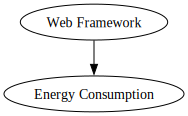

In [221]:
# Initializing a Causal Inference Model (DAG: Directed Acyclic Graph)
CausalGraphicalModel(
    nodes=["Web Framework", "Energy Consumption"],
    edges=[
        ("Web Framework", "Energy Consumption"),
    ]
).draw()

<br>

### 2. Data Preparation

Creating dummy variables for the categorical variable `framework` allows us to use them as individual predictors in the regression model. Since we hypothesize that `c-sharp-razor` consumes the most energy, we use this framework as the _baseline_ category. As such, we exclude its dummy variable from the regression model. This means the coefficients of other frameworks will be interpreted relative to `c-sharp-razor`. 

In [222]:
# Get framework categories
df['framework'] = df['framework'].astype('category')
current_categories = df['framework'].cat.categories.tolist()

# Set razor as first category and drop it
df['framework'] = df['framework'].cat.reorder_categories(
    ['razor'] + [cat for cat in current_categories if cat != 'razor'],
    ordered = False
)

# Combine with original data
X_h1 = pd.get_dummies(df['framework'], drop_first = True)  
y = df['energy_consumption'].values

<br>

### 3. Prior Probability Selection

Prior probabilities reasoning:

**General Principles for Choosing Priors (as per "Statistical Rethinking" and good Bayesian practice):**
*   Priors should reflect knowledge *before* observing the current dataset. They should not be directly determined by summary statistics of the current data, as this amounts to using the data twice.
*   Ideally, priors come from previous research, domain expertise, or theoretical constraints.
*   When specific prior information is lacking, *weakly informative priors* are used. These are priors that are broad enough to let the data speak, but specific enough to keep the MCMC sampler in a reasonable parameter space and act as a form of regularization.
*   **Prior predictive checks** are essential to understand the implications of your chosen priors.

<br>

We select the following priors for our model:

**Intercept** ($\alpha \sim \mathcal{N}(0.5, 0.2)$): Represents the baseline energy consumption for `c-sharp-razor`. The prior is centered at 0.5 Joules, reflecting an assumption based of energy consumption values typically being small but positive. The standard deviation of 0.2 allows for moderate uncertainty, covering a range of plausible baseline values. This choice ensures flexibility while constraining the prior to realistic energy levels.

**Framework Effects** ($\beta \sim \mathcal{N}(0, 0.2)$): Captures differences in energy consumption between frameworks, and we assume small deviations from the baseline. The prior is centered at 0, as we assume frameworks may not differ significantly in energy consumption. The standard deviation of 0.2 allows for moderate variability, ensuring that the prior is weakly informative and does not overly constrain the model.

**Residual SD** ($\sigma \sim \text{HalfNormal}(0.5)$): Models unexplained variability in energy consumption, constrained to positive values. The HalfNormal distribution with a scale of 0.5 reflects the expectation that residual variability is relatively small but allows for larger values if supported by the data. This choice ensures the model can account for noise while maintaining realistic bounds on the variability. We specifically choose a HalfNormal distribution over an Exponential distribution because the HalfNormal is symmetric around zero (before truncation) and allows for a more gradual decay in probability for larger values, which better aligns with the expectation of moderate variability rather than extreme outliers.

<br>

As such, we can specify our **linear model** as:

\begin{aligned}
    h_i    & \sim \mathcal N (\mu_i, \sigma)         & \quad [\,\text{likelihood for observed outcome } h_i\,]   \\
    \mu_i  & =    \alpha + \beta_{F[i]}  & \quad [\,\text{linear model}\, x \text{ predictor}\,] \\
    \alpha & \sim \mathcal N (0.5, 0.2)            & \quad [\,\alpha \text{ prior, parameter}\,]        \\
    \beta  & \sim \mathcal N (0, 0.2)            & \quad [\,\beta  \text{ prior, parameter}\,]        \\
    \sigma & \sim \text{HalfNormal} (0.5)             & \quad [\,\sigma \text{ prior, parameter}\,]
\end{aligned}

<br>

### 4. Prior Predictive Checks

We perform prior predictive checks by sampling data from the priors and plotting the resulting distributions of:

1. Simulated energy consumption values (simulated $y$)
2. Simulated energy means (simulated $\mu$)
3. Distributions of each prior parameter ($\alpha$, $\beta$, and $\sigma$)

Additionally, we check the amount of negative simulated energy consumption values and energy means, as we would expect these to be positive.

Performing these prior predictive checks allows us to visualize the implications of our prior choices and ensure they are reasonable before fitting the model to the actual data.

Sampling: [alpha, betas, sigma, y_simulated]


Plotting Prior Predictive Distribution for y_simulated (Energy Consumption):


/var/folders/yw/s572_ycn0n5d19g5p1z13l3c0000gn/T/ipykernel_93437/2673266044.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


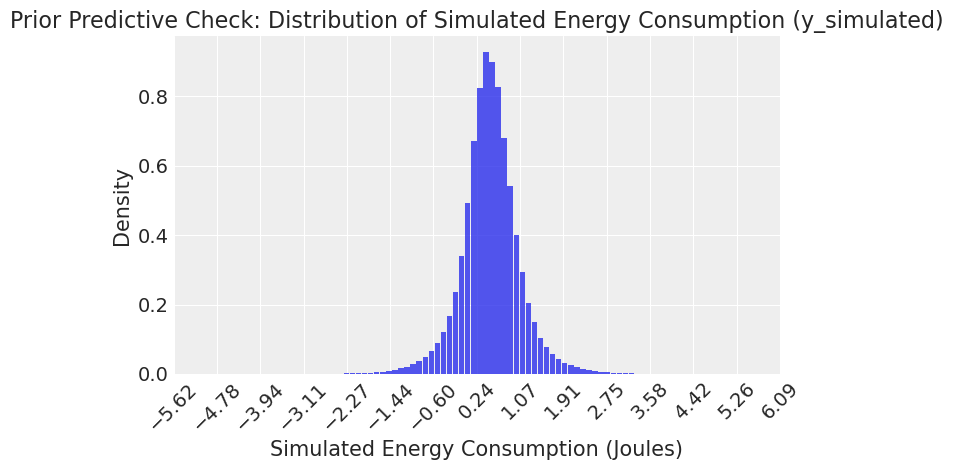


Plotting Prior Predictive Distribution for mu_values (Mean Energy Consumption):


/var/folders/yw/s572_ycn0n5d19g5p1z13l3c0000gn/T/ipykernel_93437/2673266044.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


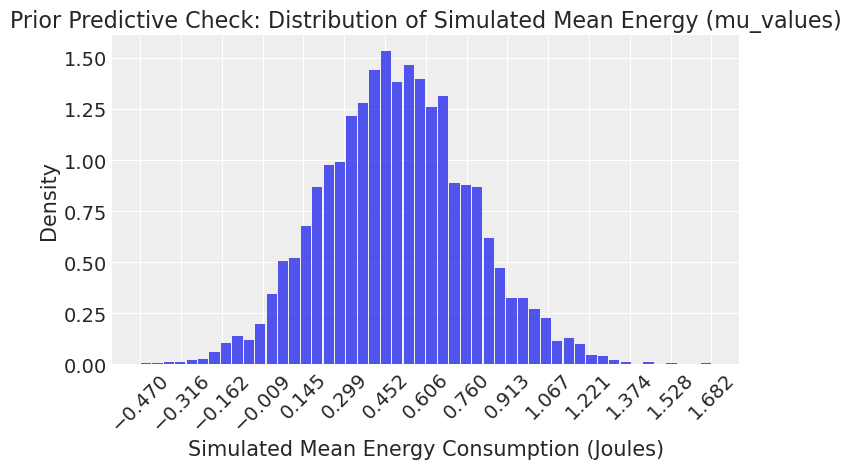


Plotting Prior Distributions for Parameters:


/var/folders/yw/s572_ycn0n5d19g5p1z13l3c0000gn/T/ipykernel_93437/2673266044.py:78: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


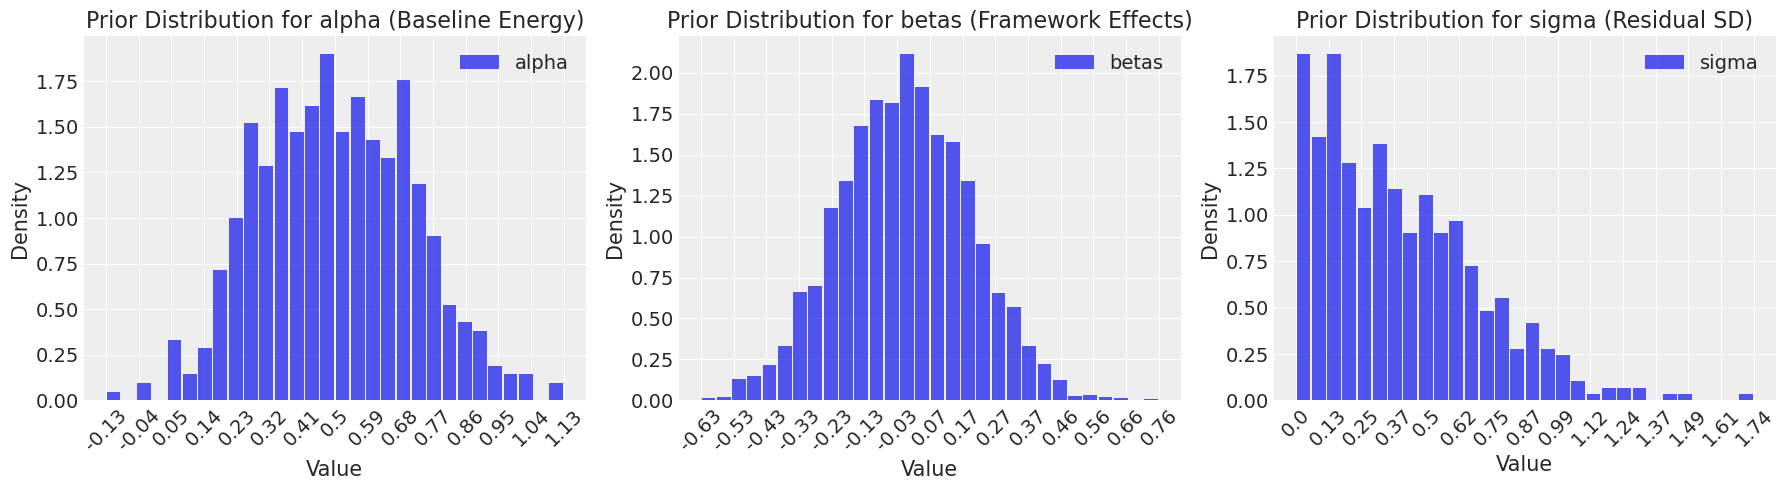


Percentage of simulated energy consumption values (y_simulated) < 0: 14.13%
Percentage of simulated mean energy values (mu_values) < 0: 2.91%


In [223]:
# Define the model for prior predictive checks
with pm.Model() as model_h1_prior_pred:
    # Priors
    alpha = pm.Normal("alpha", mu = .5, sigma = .2)                       # Baseline energy consumption for c-sharp-razor
    betas = pm.Normal("betas", mu = 0, sigma = .2, shape = X_h1.shape[1]) # Effects of other frameworks
    sigma = pm.HalfNormal("sigma", sigma = .5)                            # Residual standard deviation

    # Deterministic mu for inspection
    mu_deterministic = pm.Deterministic("mu_values", alpha + pm.math.dot(X_h1.values, betas))

    # Likelihood for prior predictive sampling
    y_simulated = pm.Normal("y_simulated", mu = mu_deterministic, sigma = sigma, shape = y.shape[0])

    # Sample from the prior predictive distribution
    prior_pred_samples_h1 = pm.sample_prior_predictive(samples = 500, random_seed = 42)


# Plot the prior predictive distribution for simulated energy consumption (y_simulated)
print("Plotting Prior Predictive Distribution for y_simulated (Energy Consumption):")
simulated_y = prior_pred_samples_h1.prior["y_simulated"].stack(samples = ("chain", "draw")).values # Stack simulated values
az.plot_dist(simulated_y, kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 100}) # Plot using ArviZ
plt.xlabel("Simulated Energy Consumption (Joules)")
plt.ylabel("Density")
plt.title("Prior Predictive Check: Distribution of Simulated Energy Consumption (y_simulated)")
x_llimit, x_ulimit = np.min(simulated_y), np.max(simulated_y)
plt.xlim(x_llimit, x_ulimit) # Set x-axis limits to 5% and 95% quantiles
plt.xticks(np.linspace(x_llimit, x_ulimit, num = 15), rotation = 45)
plt.tight_layout()
plt.show()

# Plotting the prior predictive distribution for mu_values
print("\nPlotting Prior Predictive Distribution for mu_values (Mean Energy Consumption):")
mu_values = prior_pred_samples_h1.prior["mu_values"].stack(samples = ("chain", "draw"))
az.plot_dist(mu_values, kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 50})
plt.xlabel("Simulated Mean Energy Consumption (Joules)")
plt.ylabel("Density")
plt.title("Prior Predictive Check: Distribution of Simulated Mean Energy (mu_values)")
x_min, x_max = np.min(mu_values), np.max(mu_values)
x_ticks = np.linspace(x_min, x_max, num = 15)
plt.xticks(x_ticks, rotation = 45)
plt.tight_layout()
plt.show()

# Plotting the distributions of the priors themselves for alpha, betas, and sigma
print("\nPlotting Prior Distributions for Parameters:")
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Alphas
alpha_values = prior_pred_samples_h1.prior["alpha"].stack(samples=("chain", "draw"))
az.plot_dist(alpha_values, ax = axes[0], label = "alpha", kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 30})
x_ticks = np.linspace(np.min(alpha_values), np.max(alpha_values), num = 15)
axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels(np.round(x_ticks, 2), rotation = 45)
axes[0].set_title("Prior Distribution for alpha (Baseline Energy)")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")

# Betas
beta_values = prior_pred_samples_h1.prior["betas"].stack(samples = ("chain", "draw"))
az.plot_dist(beta_values, ax = axes[1], label = "betas", kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 30})
x_ticks = np.linspace(np.min(beta_values), np.max(beta_values), num = 15)
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels(np.round(x_ticks, 2), rotation = 45)
axes[1].set_title("Prior Distribution for betas (Framework Effects)")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Density")

# Sigmas
sigma_values = prior_pred_samples_h1.prior["sigma"].stack(samples = ("chain", "draw"))
az.plot_dist(sigma_values, ax = axes[2], label = "sigma", kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 30})
x_ticks = np.linspace(np.min(sigma_values), np.max(sigma_values), num = 15)
axes[2].set_xticks(x_ticks)
axes[2].set_xticklabels(np.round(x_ticks, 2), rotation = 45)
axes[2].set_title("Prior Distribution for sigma (Residual SD)")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Density")

plt.tight_layout()
plt.show()

# Check for negative energy values
simulated_y_flat = prior_pred_samples_h1.prior["y_simulated"].stack(samples = ("chain", "draw")).values
negative_y_percentage = np.mean(simulated_y_flat < 0) * 100
print(f"\nPercentage of simulated energy consumption values (y_simulated) < 0: {negative_y_percentage:.2f}%")

simulated_mu_flat = prior_pred_samples_h1.prior["mu_values"].stack(samples = ("chain", "draw")).values
negative_mu_percentage = np.mean(simulated_mu_flat < 0) * 100
print(f"Percentage of simulated mean energy values (mu_values) < 0: {negative_mu_percentage:.2f}%")

**Interpretation of Prior Predictive Checks for H1**

The plots generated by the prior predictive checks in the cell above help us to better understand the implications of the chosen priors:

1. **Distribution of Simulated Energy Consumption (`y_simulated`)**: The simulated energy consumption values align well with plausible energy levels. The range of simulated values is consistent with what we might intuitively expect for energy consumption in this context. The proportion of negative values is fairly small at 7.65%, indicating that the priors for $\alpha$ and $\sigma$ constrain the simulated values to realistic ranges.

2. **Distribution of Simulated Mean Energy Consumption (`mu_values`)**: The simulated mean energy consumption values are predominantly positive, with only 2.91% negative values. This demonstrates that the prior for the mean energy consumption is at least modestly well-calibrated, ensuring that the simulated values are centered around plausible energy levels.

3. **Prior Distributions for Parameters ($\alpha$, $\beta$, $\sigma$)**: The prior distribution plots seem to follow the specified prior distribution parameters well. 

<br>

### 5. Model Fitting and Sampling

We fit the model with `PyMC` and sample from the posterior distribution using the No-U-Turn Sampler (NUTS). The model is specified in a `with` block, and we use `pm.sample()` to draw samples from the posterior distribution. We set the number of samples to 2000 and the number of tuning steps to 1000. We use `chains=4` to run four chains in parallel for better convergence diagnostics.

Furthermore, a visualization of the model setup is printed through `pm.model_to_graphviz`.

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 19 seconds.


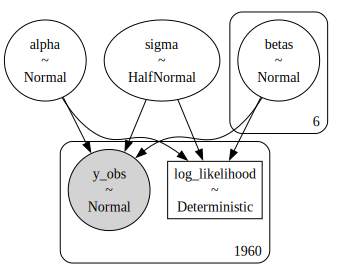

In [224]:
# Define the Bayesian model
with pm.Model() as model_h1:
    # Priors
    alpha = pm.Normal("alpha", mu = .5, sigma = .2)                       # Baseline energy consumption for c-sharp-razor
    betas = pm.Normal("betas", mu = 0, sigma = .2, shape = X_h1.shape[1]) # Effects of other frameworks
    sigma = pm.HalfNormal("sigma", sigma = .5)                            # Residual standard deviation

    # Define linear model
    mu = alpha + pm.math.dot(X_h1.values, betas)

    # Likelihood
    y_obs = pm.Normal("y_obs", mu = mu, sigma = sigma, observed = y)

    # Add log likelihood
    log_likelihood = pm.logp(y_obs, y)  # Pass the observed data explicitly
    pm.Deterministic("log_likelihood", log_likelihood)

    # Sampling
    trace_h1 = pm.sample(2000, tune = 1000, target_accept = .95, return_inferencedata = True, random_seed = 42, idata_kwargs={"log_likelihood": True})

pm.model_to_graphviz(model_h1)

<br>

### 6. Trace Plot and Summary Analysis

We use **trace plots** to visualize the posterior distributions generated by the four chains in the sampling process. We use **summary statistics** to assess the convergence, quality of estimates, and statistical significance. 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.6759,0.0157,0.6465,0.7056,0.0003,0.0002,2368.9851,3353.5553,1.0025
betas[0],-0.3668,0.0225,-0.4084,-0.3243,0.0004,0.0003,3114.6669,4455.8722,1.0018
betas[1],-0.4673,0.0224,-0.5079,-0.4230,0.0004,0.0003,3702.0578,4553.0219,1.0014
betas[2],-0.2612,0.0222,-0.3036,-0.2202,0.0004,0.0003,3382.4771,5035.7152,1.0019
betas[3],-0.3547,0.0227,-0.3958,-0.3104,0.0004,0.0003,3323.4733,4555.4247,1.0016
betas[4],-0.3495,0.0221,-0.3898,-0.3067,0.0004,0.0003,3252.9791,4088.6295,1.0020
betas[5],-0.2651,0.0221,-0.3075,-0.2243,0.0004,0.0003,3294.3401,4315.0822,1.0022
sigma,0.2659,0.0043,0.2577,0.2736,0.0001,0.0000,7069.1932,5526.0294,1.0003


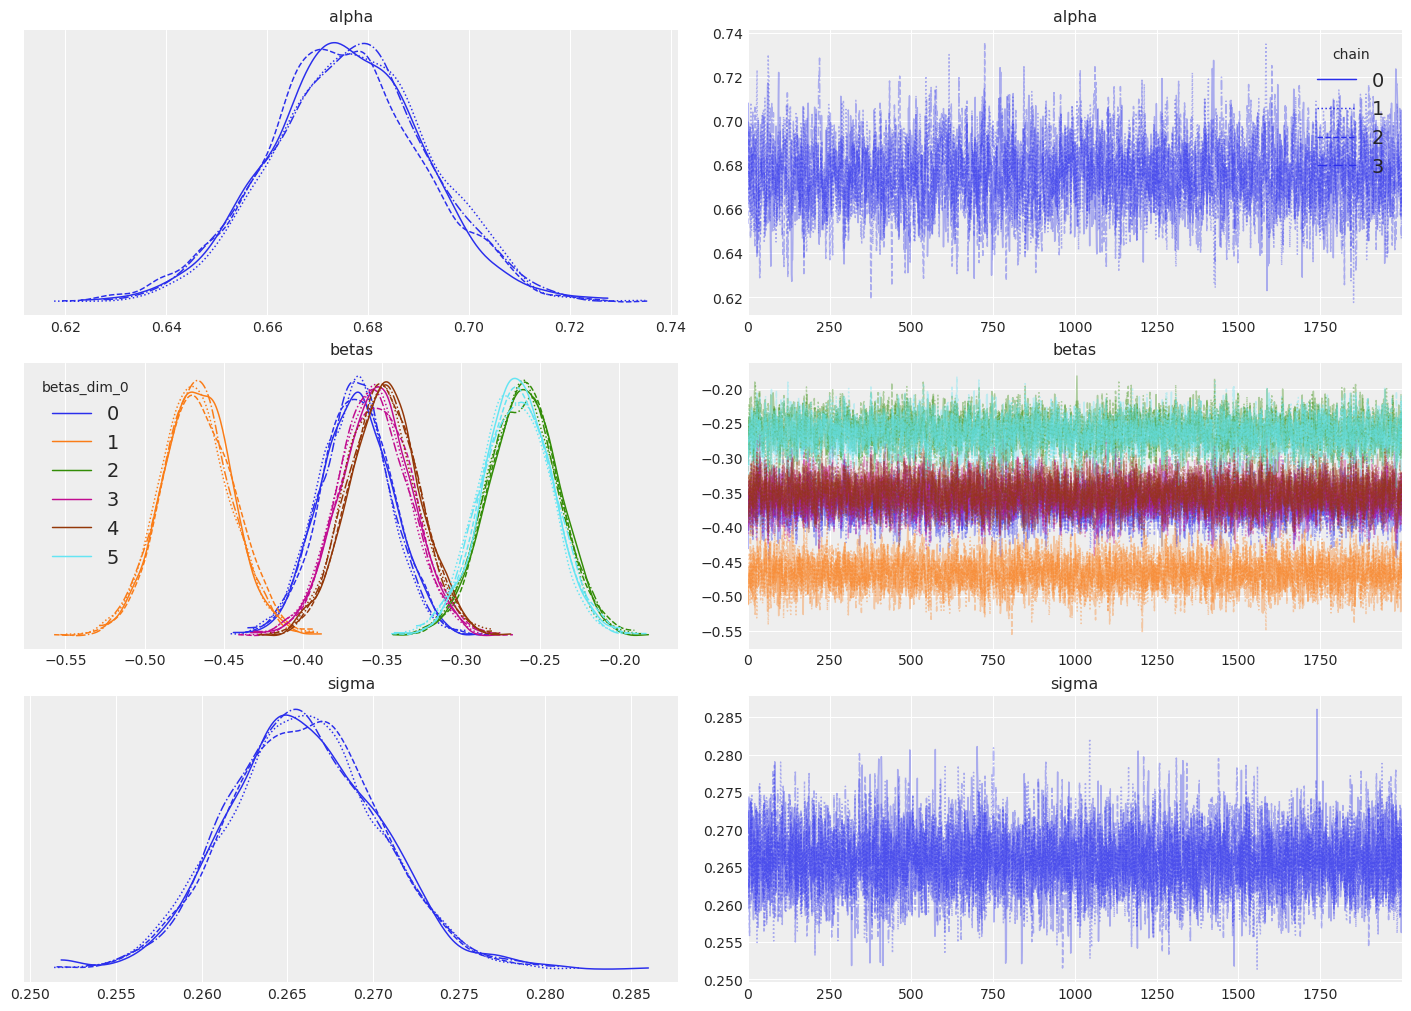

In [225]:
# Posterior analysis
az.plot_trace(trace_h1, var_names = ["alpha", "betas", "sigma"], figsize = (14, 10), legend = True)
az.summary(trace_h1, var_names = ["alpha", "betas", "sigma"], round_to = 4)

**Interpretation of Trace Plots and Summary Statistics for H1**

1. **Trace Plots**
- Trace plots for $\alpha$ and $\sigma$ are generally stationary and without trends, converging around a consistent range of values.
- Trace plots for the beta coefficients imply that the frameworks can be categorized into three groups based on their energy consumption relative to the baseline:
    1. $\beta_1$ (lowest on the y-axis, centered around approx. -0.47): The $\beta_1$ trace plot has the lowest energy consumption when compared to the baseline.
    2. $\beta_0$, $\beta_3$, $\beta_4$ (centered around approx. -0.35): The three frameworks in this group also seem to consume less energy than the baseline, but more than $\beta_1$. Since these beta coefficients overlap, the differences in energy consumption seem to be insignificant.
    3. $\beta_2$, $\beta_5$ (centered around approx. -0.27): The frameworks in this group consume the most energy among the non-baseline frameworks, but still less than the baseline. Since these beta coefficients overlap, the difference in energy consumption between them seems to be insignificant.

2. **Posterior Distrubutions**
- The distributions are unimodal and do not look overly wide or flat

3. **Summary Table**
- `R-hat` is close to 1 for all parameters, indicating good convergence.
- `ESS` are sufficiently large for all parameters, indicating reliable estimates.
- `HDI` does not include 0 for any betas, indicating that the effects are statistically significant.

<br>

### 7. Posterior Predictive Checks

We perform posterior predictive checks to assess the model's fit to the data. By sampling from the posterior distribution, we can compare the observed data to the predicted responses. We plot the observed energy consumption values against the predicted values.

Sampling: [y_obs]


Output()

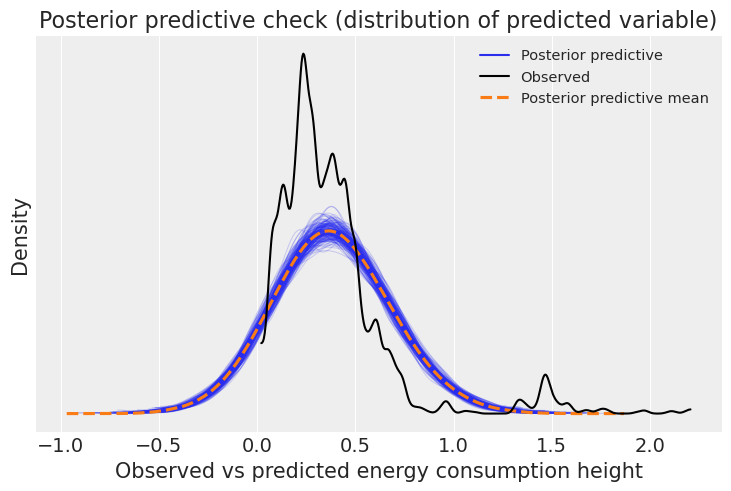

In [226]:
# Generate posterior predictive samples
with model_h1:
    ppc_h1 = pm.sample_posterior_predictive(trace_h1, var_names = ["y_obs"], random_seed = 42)

_, ax = plt.subplots()
az.plot_ppc(ppc_h1, num_pp_samples = 200, ax = ax)
ax.set_xlabel("Observed vs predicted energy consumption height")
ax.set_ylabel("Density")
ax.set_title("Posterior predictive check (distribution of predicted variable)");

**Interpretation of Posterior Predictive Checks for H1**

The plot shows the observed energy consumption values against the predicted values from the posterior predictive checks. We see that the predictions fit the observed data fairly well, although the distribution seems to have a slightly higher standard deviation. Furthermore, the predictions still produce some negative values.

However, given the checks made from trace plots and summary statistics, as well as the amount of noise in the observed data, we still believe the model fit is acceptable.

<br>

### 8. Hypothesis Conclusion

While the trace plots indicate that all other frameworks consume less energy than the baseline, we still intent to test H1 more statistically.

To do so, we quantify the evidence for each framework by computing the proportion of posterior samples where $\beta_j < 0$. This gives you the posterior probability $P(\beta_j < 0 | \text{data})$

In [227]:
# Posterior_betas will be a 3D array: (chains, draws, num_other_frameworks)
posterior_betas = trace_h1.posterior['betas'] 

# Calculate probability for each beta
prob_beta_negative = (posterior_betas < 0).mean(dim = ('chain', 'draw')) 

# To see these probabilities with framework names (assuming X.columns has the names)
framework_names = X_h1.columns # From your data prep cell
for i, name in enumerate(framework_names):
    print(f"P(beta_{name} < 0) = {prob_beta_negative[i].item():.3f}")

P(beta_actix < 0) = 1.000
P(beta_express < 0) = 1.000
P(beta_flask < 0) = 1.000
P(beta_gin < 0) = 1.000
P(beta_gorilla < 0) = 1.000
P(beta_sinatra < 0) = 1.000


As such, we can conclude that the model provides strong evidence supporting H1, i.e., that the web framework `c-sharp-razor` consumes more energy than any other web framework in the dataset. The posterior probabilities indicate that all non-baseline frameworks are virtually certain ($P(\beta < 0) = 1$) to consume less energy than `c-sharp-razor`. 

The trace plots and summary statistics further support this: all chains mix well, `R-hat` values are close to 1, and effective sample sizes are high, indicating good convergence and reliable estimates. Posterior predictive checks demonstrate that the model captures the observed data distribution reasonably well, however with some deviations. Taken together, these results provide compelling evidence in support of H1.

<br><br><br><br><br>

# **Hypothesis H2**

---
* **H2** - The programming language `javascript` consumes the least amount of energy compared to any other programming language in the dataset.
---

<br>

To evaluate hypothesis **H2** we design a Bayesian regression model, predicting energy consumption based on programming language. The implication of H2 is very similar to H1, but we are now interested in the effects of programming language rather than web framework.

As such, we can assume a very similar **linear model**, specified as follows:

\begin{aligned}
    h_i & \sim \mathcal N (\mu_i, \sigma) & \quad [\,\text{likelihood for observed outcome } h_i\,]   \\
    \mu_i & = \alpha + \beta_{L[i]} & \quad [\,\text{linear model}\, x \text{ predictor}] \\
\end{aligned}

The likelihood assumes that the observed energy consumption values $h_{i}$ are normally distributed around the predicted mean $\mu_i$ with a constant standard deviation $\sigma$. 

The mean $\mu_i$ is modeled as a linear combination of the intercept $\alpha$ and the language effects $\beta$. 

The prior probailities for parameters $\alpha$, $\beta$, and $\sigma$ are chosen based on intution and domain knowledge, as explained later.

<br>

**The modeling process again follows the below steps:**

1. Model visualization
2. Data preparation
3. Prior probability selection 
4. Prior predictive checks
5. Model fitting and sampling
6. Trace plot and summary analysis
7. Posterior predictive checks
8. Hypothesis conclusion

<br>

### 1. Model Visualization

First, we draw the model design as a simple directed acyclic graph (DAG).

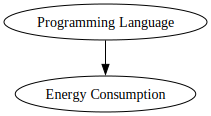

In [228]:
# Initializing a Causal Inference Model (DAG: Directed Acyclic Graph)
CausalGraphicalModel(
    nodes=["Programming Language", "Energy Consumption"],
    edges=[
        ("Programming Language", "Energy Consumption"),
    ]
).draw()

<br>

### 2. Data Preparation

Creating dummy variables for the categorical variable `language` allows us to use them as individual predictors in the regression model. Since we hypothesize that `javescript` consumes the least energy, we use this language as the _baseline_ category. As such, we exclude its dummy variable from the regression model. This means the coefficients of other languages will be interpreted relative to `javescript`. 

In [229]:
# Make javascript the baseline language
df['language'] = df['language'].astype('category')
df['language'] = df['language'].cat.reorder_categories(
    ['javascript'] + [cat for cat in df['language'].cat.categories if cat != 'javascript'],
    ordered = False
)

# Combine with original data
X_h2 = pd.get_dummies(df['language'], drop_first = True)
y = df['energy_consumption'].values

<br>

### 3. Prior Probability Selection

Given the similarity of the model to H1, we can use the same prior probabilities for the parameters. 

The only difference is that we now use the language as the predictor instead of the framework, essentially changing the interpretation of the $\beta$ coefficients. However, we would still have a base assumption that the change in energy consumption based on the programming language would be 0, and thus we set the prior for $\beta$ to be centered around 0. We similarly keep the standard deviation of 0.2 for $\beta$ to allow for moderate variability.

As such, we can specify our **linear model** as:

\begin{aligned}
    h_i    & \sim \mathcal N (\mu_i, \sigma)         & \quad [\,\text{likelihood for observed outcome } h_i\,]   \\
    \mu_i  & =    \alpha + \beta_{L[i]}  & \quad [\,\text{linear model}\, x \text{ predictor}\,] \\
    \alpha & \sim \mathcal N (0.5, 0.2)            & \quad [\,\alpha \text{ prior, parameter}\,]        \\
    \beta  & \sim \mathcal N (0, 0.2)            & \quad [\,\beta  \text{ prior, parameter}\,]        \\
    \sigma & \sim \text{HalfNormal} (0.5)             & \quad [\,\sigma \text{ prior, parameter}\,]
\end{aligned}

<br>

### 4. Prior Predictive Checks

We perform prior predictive checks by sampling data from the priors and plotting the resulting distributions of:

1. Simulated energy consumption values (simulated $y$)
2. Simulated energy means (simulated $\mu$)
3. Distributions of each prior parameter ($\alpha$, $\beta$, and $\sigma$)

Additionally, we check the amount of negative simulated energy consumption values and energy means, as we would expect these to be positive.

Performing these prior predictive checks allows us to visualize the implications of our prior choices and ensure they are reasonable before fitting the model to the actual data.

Sampling: [alpha, betas, sigma, y_simulated]
/var/folders/yw/s572_ycn0n5d19g5p1z13l3c0000gn/T/ipykernel_93437/209421206.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Plotting Prior Predictive Distribution for y_simulated (Energy Consumption):


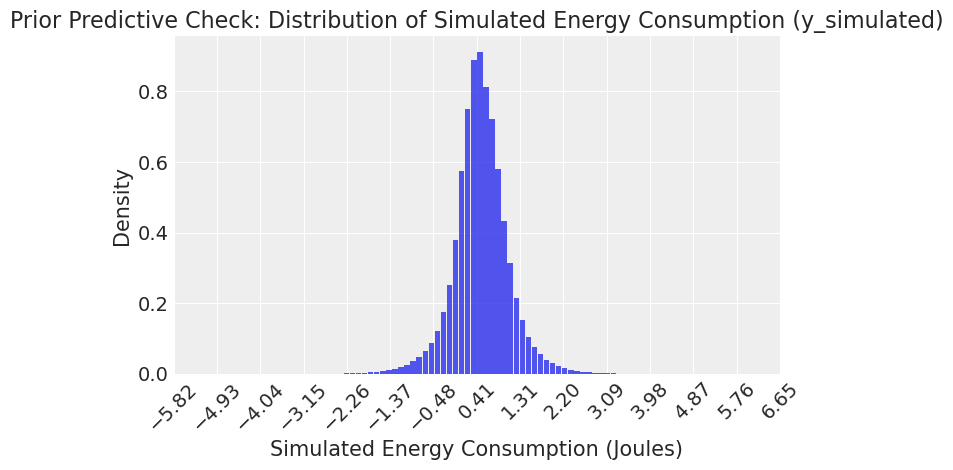


Plotting Prior Predictive Distribution for mu_values (Mean Energy Consumption):


/var/folders/yw/s572_ycn0n5d19g5p1z13l3c0000gn/T/ipykernel_93437/209421206.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


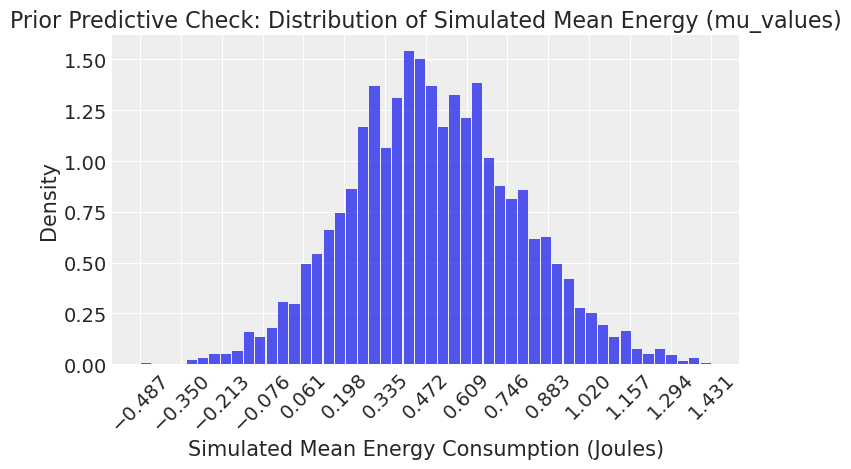


Plotting Prior Distributions for Parameters:


/var/folders/yw/s572_ycn0n5d19g5p1z13l3c0000gn/T/ipykernel_93437/209421206.py:77: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


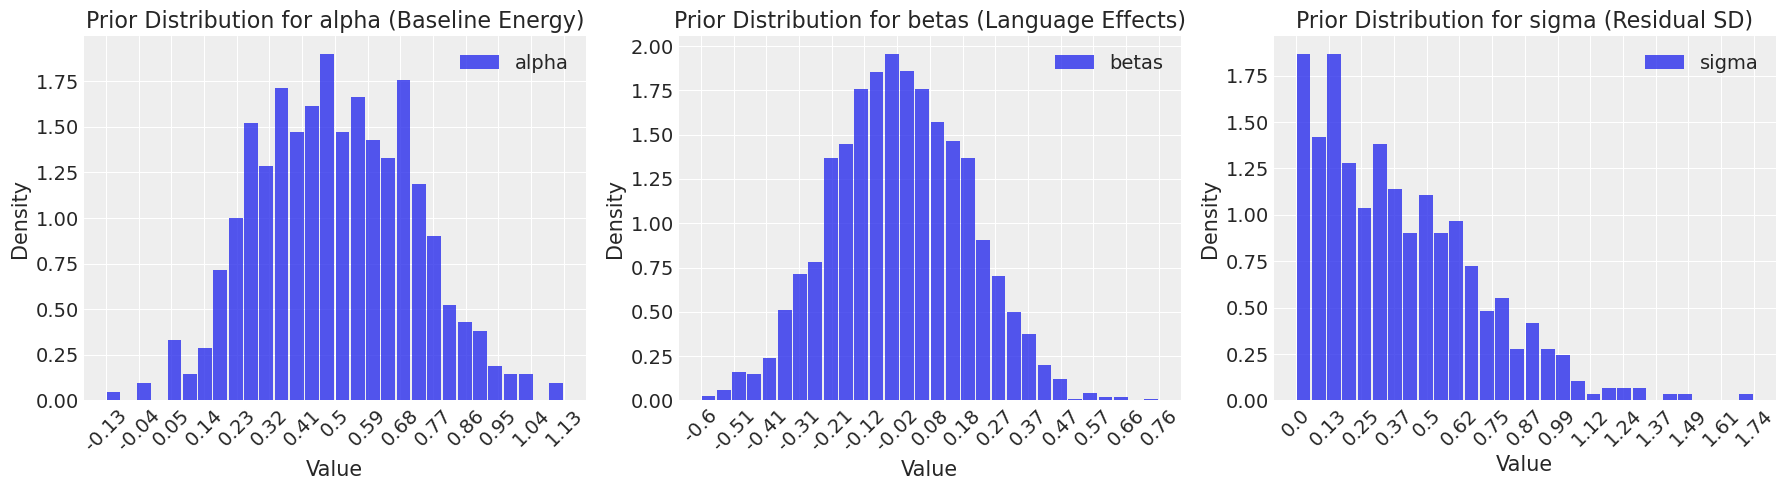


Percentage of simulated energy consumption values (y_simulated) < 0: 14.06%
Percentage of simulated mean energy values (mu_values) < 0: 3.51%


In [230]:
# Define the model for prior predictive checks
with pm.Model() as model_h2_prior_pred:
    # Priors
    alpha = pm.Normal("alpha", mu =  .5, sigma = .2)                       # Baseline energy consumption for javascript
    betas = pm.Normal("betas", mu =  0, sigma = .2, shape = X_h2.shape[1]) # Effects of other languages
    sigma = pm.HalfNormal("sigma", sigma = .5)                             # Residual standard deviation

    # Deterministic mu for inspection
    mu_deterministic = pm.Deterministic("mu_values", alpha + pm.math.dot(X_h2.values, betas))

    # Likelihood for prior predictive sampling
    y_simulated = pm.Normal("y_simulated", mu = mu_deterministic, sigma = sigma, shape = y.shape[0])

    # Sample from the prior predictive distribution
    prior_pred_samples_h2 = pm.sample_prior_predictive(samples = 500, random_seed = 42)

# Plot the prior predictive distribution for simulated energy consumption (y_simulated)
print("Plotting Prior Predictive Distribution for y_simulated (Energy Consumption):")
simulated_y = prior_pred_samples_h2.prior["y_simulated"].stack(samples = ("chain", "draw")).values  # Stack simulated values
az.plot_dist(simulated_y, kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 100})  # Plot using ArviZ
plt.xlabel("Simulated Energy Consumption (Joules)")
plt.ylabel("Density")
plt.title("Prior Predictive Check: Distribution of Simulated Energy Consumption (y_simulated)")
x_llimit, x_ulimit = np.min(simulated_y), np.max(simulated_y)
plt.xlim(x_llimit, x_ulimit)  # Set x-axis limits
plt.xticks(np.linspace(x_llimit, x_ulimit, num = 15), rotation = 45)
plt.tight_layout()
plt.show()

# Plotting the prior predictive distribution for mu_values
print("\nPlotting Prior Predictive Distribution for mu_values (Mean Energy Consumption):")
mu_values = prior_pred_samples_h2.prior["mu_values"].stack(samples = ("chain", "draw"))
az.plot_dist(mu_values, kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 50})
plt.xlabel("Simulated Mean Energy Consumption (Joules)")
plt.ylabel("Density")
plt.title("Prior Predictive Check: Distribution of Simulated Mean Energy (mu_values)")
x_min, x_max = np.min(mu_values), np.max(mu_values)
x_ticks = np.linspace(x_min, x_max, num = 15)
plt.xticks(x_ticks, rotation = 45)
plt.tight_layout()
plt.show()

# Plotting the distributions of the priors themselves for alpha, betas, and sigma
print("\nPlotting Prior Distributions for Parameters:")
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Alphas
alpha_values = prior_pred_samples_h2.prior["alpha"].stack(samples = ("chain", "draw"))
az.plot_dist(alpha_values, ax = axes[0], label = "alpha", kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 30})
x_ticks = np.linspace(np.min(alpha_values), np.max(alpha_values), num = 15)
axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels(np.round(x_ticks, 2), rotation = 45)
axes[0].set_title("Prior Distribution for alpha (Baseline Energy)")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")

# Betas
beta_values = prior_pred_samples_h2.prior["betas"].stack(samples = ("chain", "draw"))
az.plot_dist(beta_values, ax = axes[1], label = "betas", kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 30})
x_ticks = np.linspace(np.min(beta_values), np.max(beta_values), num = 15)
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels(np.round(x_ticks, 2), rotation = 45)
axes[1].set_title("Prior Distribution for betas (Language Effects)")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Density")

# Sigmas
sigma_values = prior_pred_samples_h2.prior["sigma"].stack(samples = ("chain", "draw"))
az.plot_dist(sigma_values, ax = axes[2], label = "sigma", kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 30})
x_ticks = np.linspace(np.min(sigma_values), np.max(sigma_values), num = 15)
axes[2].set_xticks(x_ticks)
axes[2].set_xticklabels(np.round(x_ticks, 2), rotation = 45)
axes[2].set_title("Prior Distribution for sigma (Residual SD)")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Density")

plt.tight_layout()
plt.show()

# Check for negative energy values
simulated_y_flat = prior_pred_samples_h2.prior["y_simulated"].stack(samples = ("chain", "draw")).values
negative_y_percentage = np.mean(simulated_y_flat < 0) * 100
print(f"\nPercentage of simulated energy consumption values (y_simulated) < 0: {negative_y_percentage:.2f}%")

simulated_mu_flat = prior_pred_samples_h2.prior["mu_values"].stack(samples = ("chain", "draw")).values
negative_mu_percentage = np.mean(simulated_mu_flat < 0) * 100
print(f"Percentage of simulated mean energy values (mu_values) < 0: {negative_mu_percentage:.2f}%")

**MODIFY THIS TO REFLECT H2 PRIOR PREDICTIVE CHECKS**

**Interpretation of Prior Predictive Checks for H1**

The plots generated by the prior predictive checks in the cell above help us to better understand the implications of the chosen priors:

1. **Distribution of Simulated Energy Consumption (`y_simulated`)**: The simulated energy consumption values align well with plausible energy levels. The range of simulated values is consistent with what we might intuitively expect for energy consumption in this context. The proportion of negative values is fairly small at 7.65%, indicating that the priors for $\alpha$ and $\sigma$ constrain the simulated values to realistic ranges.

2. **Distribution of Simulated Mean Energy Consumption (`mu_values`)**: The simulated mean energy consumption values are predominantly positive, with only 2.91% negative values. This demonstrates that the prior for the mean energy consumption is at least modestly well-calibrated, ensuring that the simulated values are centered around plausible energy levels.

3. **Prior Distributions for Parameters ($\alpha$, $\beta$, $\sigma$)**: The prior distribution plots seem to follow the specified prior distribution parameters well. 

<br>

### 5. Model Fitting and Sampling

We fit the model with `PyMC` and sample from the posterior distribution using the No-U-Turn Sampler (NUTS). The model is specified in a `with` block, and we use `pm.sample()` to draw samples from the posterior distribution. We set the number of samples to 2000 and the number of tuning steps to 1000. We use `chains=4` to run four chains in parallel for better convergence diagnostics.

Furthermore, a visualization of the model setup is printed through `pm.model_to_graphviz`.

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 17 seconds.


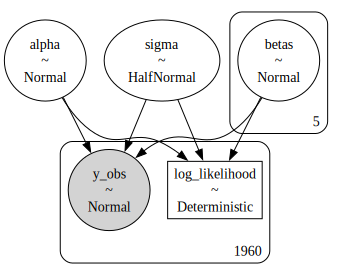

In [231]:

# Define the Bayesian model for H2
with pm.Model() as model_h2:
    # Priors
    alpha = pm.Normal("alpha", mu =  .5, sigma = .2)                       # Baseline energy consumption for javascript
    betas = pm.Normal("betas", mu =  0, sigma = .2, shape = X_h2.shape[1]) # Effects of other languages
    sigma = pm.HalfNormal("sigma", sigma = .5)                             # Residual standard deviation

    # Define the linear model
    mu = alpha + pm.math.dot(X_h2.values, betas)

    # Likelihood
    y_obs = pm.Normal("y_obs", mu = mu, sigma = sigma, observed = y)

    # Add log likelihood
    log_likelihood = pm.logp(y_obs, y)  # Pass the observed data explicitly
    pm.Deterministic("log_likelihood", log_likelihood)

    # Sampling
    trace_h2 = pm.sample(2000, tune = 1000, target_accept = 0.95, return_inferencedata = True, random_seed = 42, idata_kwargs={"log_likelihood": True})

pm.model_to_graphviz(model_h2)

<br>

### 6. Trace Plot and Summary Analysis

We use **trace plots** to visualize the posterior distributions generated by the four chains in the sampling process. We use **summary statistics** to assess the convergence, quality of estimates, and statistical significance. 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.2145,0.0160,0.1858,0.2457,0.0003,0.0002,2389.9161,3429.0359,1.0007
betas[0],0.4716,0.0224,0.4305,0.5149,0.0004,0.0003,3367.0022,4705.8136,1.0002
betas[1],0.1069,0.0197,0.0697,0.1438,0.0004,0.0003,2964.4370,4507.7140,1.0006
betas[2],0.1975,0.0227,0.1555,0.2393,0.0004,0.0003,3283.5226,5019.5257,1.0006
betas[3],0.1935,0.0227,0.1497,0.2346,0.0004,0.0003,3271.9723,4655.0864,1.0003
betas[4],0.0917,0.0227,0.0496,0.1346,0.0004,0.0003,3085.7378,4589.7075,1.0008
sigma,0.2657,0.0043,0.2578,0.2741,0.0001,0.0000,6049.5520,4887.9973,0.9999


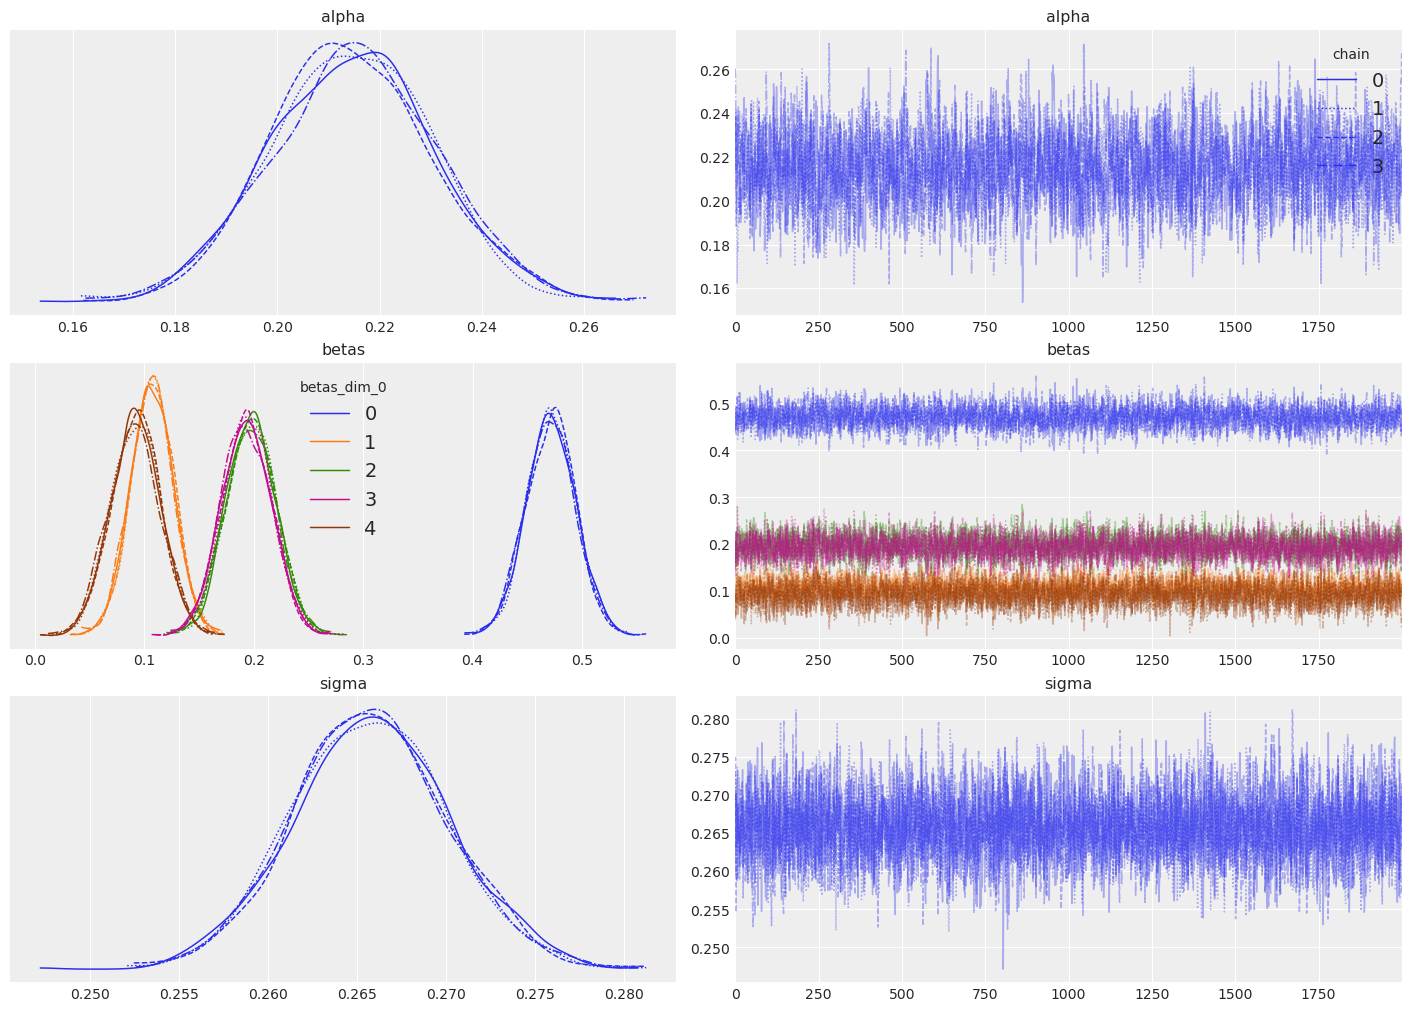

In [232]:
# Posterior analysis
az.plot_trace(trace_h2, var_names = ["alpha", "betas", "sigma"], figsize = (14, 10), legend = True)
az.summary(trace_h2, var_names = ["alpha", "betas", "sigma"], round_to = 4)

**Interpretation of Trace Plots and Summary Statistics for H2**

1. **Trace Plots**
- Trace plots for $\alpha$ and $\sigma$ are generally stationary and without trends, converging around a consistent range of values.
- Trace plots for the beta coefficients imply that the languages can be categorized into three groups based on their energy consumption relative to the baseline:
    1. $\beta_0$ (highest on the y-axis, centered around approx. 0.47): The $\beta_0$ trace plot has the highest energy consumption when compared to the baseline.
    2. $\beta_2$, $\beta_3$ (centered around approx. 0.2): The two languages in this group also seem to consume more energy than the baseline, but less than the $\beta_0$. Since these beta coefficients overlap, the differences in energy consumption between them1seem to be insignificant.
    3. $\beta_1$, $\beta_1$ (centered around approx. 0.1): The languages in this group consume the least energy among the non-baseline frameworks, but still more than the baseline. Since these beta coefficients overlap, the difference in energy consumption between them seems to be insignificant.

2. **Posterior Distrubutions**
- The distributions are unimodal and do not look overly wide or flat

3. **Summary Table**
- `R-hat` is close to 1 for all parameters, indicating good convergence.
- `ESS` are sufficiently large for all parameters, indicating reliable estimates.
- `HDI` does not include 0 for any betas, indicating that the effects are statistically significant.

<br>

### 7. Posterior Predictive Checks

We perform posterior predictive checks to assess the model's fit to the data. By sampling from the posterior distribution, we can compare the observed data to the predicted responses. We plot the observed energy consumption values against the predicted values.

Sampling: [y_obs]


Output()

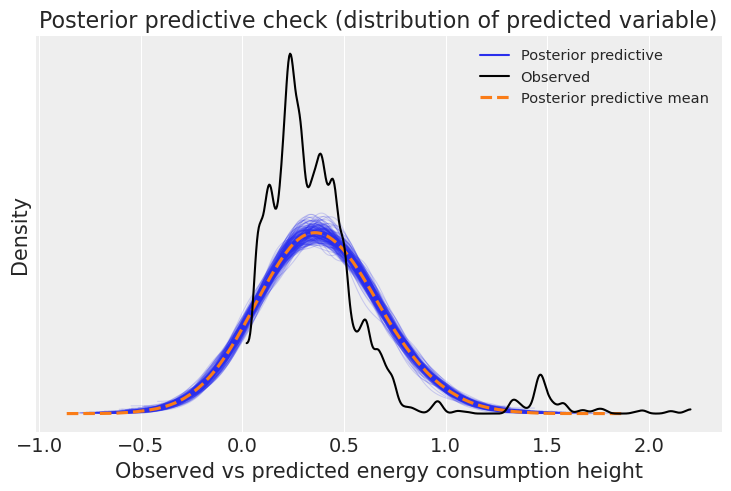

In [233]:
# Generate posterior predictive samples
with model_h2:
    ppc_h2 = pm.sample_posterior_predictive(trace_h2, var_names = ["y_obs"], random_seed = 42)

_, ax = plt.subplots()
az.plot_ppc(ppc_h2, num_pp_samples = 200, ax = ax)
ax.set_xlabel("Observed vs predicted energy consumption height")
ax.set_ylabel("Density")
ax.set_title("Posterior predictive check (distribution of predicted variable)");

**Interpretation of Posterior Predictive Checks for H2**

The plot shows the observed energy consumption values against the predicted values from the posterior predictive checks. We see that the predictions fit the observed data fairly well, although the distribution seems to have a slightly higher standard deviation. Furthermore, the predictions still produce some negative values.

However, given the checks made from trace plots and summary statistics, as well as the amount of noise in the observed data, we still believe the model fit is acceptable.

It should be noted that **this posterior predictive check plot is essentially identical to the one for H1**. This is expected, as the two models for H1 and H2 are very similar, with the only difference being the predictor variable. Furthermore, the two predictor variables (`framework` and `language`) are highly correlated with an almost 1-to-1 mapping. All languages map to exactly one framework each, except for `go`, which uses either `gorilla` or `gin`.

<br>

### 8. Hypothesis Conclusion

While the trace plots indicate that all other frameworks consume more energy than the baseline, we still intent to test H2 more statistically.

To do so, we quantify the evidence for each framework by computing the proportion of posterior samples where $\beta_j > 0$. This gives us the posterior probabilities $P(\beta_j > 0 | \text{data})$

In [234]:
# Posterior_betas will be a 3D array: (chains, draws, num_other_languagea)
posterior_betas = trace_h2.posterior['betas'] 

# Calculate probability for each beta
prob_beta_positive = (posterior_betas > 0).mean(dim = ('chain', 'draw')) 

# To see these probabilities with language names (assuming X.columns has the names)
framework_names = X_h2.columns # From your data prep cell
for i, name in enumerate(framework_names):
    print(f"P(beta_{name} > 0) = {prob_beta_positive[i].item():.3f}")

P(beta_c-sharp > 0) = 1.000
P(beta_go > 0) = 1.000
P(beta_python > 0) = 1.000
P(beta_ruby > 0) = 1.000
P(beta_rust > 0) = 1.000


As such, we can conclude that the model provides strong evidence supporting H2, i.e., that the programming language `javascript` consumes less energy than any other web framework in the dataset. The posterior probabilities indicate that all non-baseline frameworks are virtually certain ($P(\beta > 0) = 1$) to consume more energy than `javascript`. 

The trace plots and summary statistics further support this: all chains mix well, `R-hat` values are close to 1, and effective sample sizes are high, indicating good convergence and reliable estimates. Posterior predictive checks demonstrate that the model captures the observed data distribution reasonably well, however with some deviations. Taken together, these results provide compelling evidence in support of H2.

<br><br><br><br><br>

# **Hypothesis H3**

---
* **H3** - Runtime has a stronger impact on energy consumption for some API endpoints than others. That is, the effect of runtime on energy consumption is larger for some API endpoints than others.
---

<br>

To evaluate hypothesis **H3** we design a Bayesian regression model, predicting energy consumption based on runtime _stratified_ by all the unique API endpoints. 

We are assuming a **multilevel model**, specified as follows:

\begin{aligned}
    h_i \sim \mathcal{N}(\mu_i, \sigma) & \quad [\,\text{likelihood}\, h \text{ predicted var}] \\
    \mu_i = \alpha_{\text{ep}[i]} + \beta_{\text{ep}[i]} \cdot R_i & \quad [\,\text{multilevel model}\, R \text{ predictor}] \\
\end{aligned}

Where:

- $\alpha_{\text{ep}[i]}$ is an endpoint-specific intercept.  
- $\beta_{\text{ep}[i]}$ is an endpoint-specific slope for runtime.  
- $\text{R}[i]$ is the runtime, that is working as the explanatory predictor variable (usually x). 

(?) This is a **varying slope model**, also known as a **hierarchical** or **multilevel model**.

The likelihood assumes that the observed energy consumption values $h_{i}$ are normally distributed around the predicted mean $\mu_i$ with a constant standard deviation $\sigma$. 

The mean $\mu_i$ is modeled as a linear combination of the intercept $\alpha$ and the framework effects $\beta$. 

The prior probailities for parameters $\alpha$, $\beta$, and $\sigma$ are chosen based on intution and domain knowledge, as explained later.

<br>

**The modeling process then follows the below steps:**

1. Model visualization
2. Data preparation
3. Prior probability selection 
4. prior predictive checks
5. Model fitting and sampling
6. Trace plot and summary analysis
7. Posterior predictive checks
8. Hypothesis conclusion

<br>

### 1. Model Visualization

First, we draw the model design as a simple directed acyclic graph (DAG).

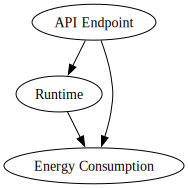

In [235]:
# Initializing a Causal Inference Model (DAG: Directed Acyclic Graph)
CausalGraphicalModel(
    nodes=["Runtime", "API Endpoint", "Energy Consumption"],
    edges=[
        ("Runtime", "Energy Consumption"),
        ("API Endpoint", "Runtime"),
        ("API Endpoint", "Energy Consumption")
    ]
).draw()

<br>

### 2. Data Preparation

In [236]:
print(len(df['endpoint'].unique()))
print(df['endpoint'].unique())

14
['/api/register' '/api/msgs/user0' '/api/msgs' '/api/fllws/user'
 '/api/unfllws/user' '/api/latest' '/register' '/login' '/user/follow'
 '/add_message' '/public' '/user/user0' '/user/unfollow' '/logout']


In [237]:
# Encode endpoint as a category
df["ep_idx"] = df["endpoint"].astype("category").cat.codes
endpoint_idx = df["ep_idx"].values
n_endpoints = df["ep_idx"].nunique()
runtime = df["runtime"].values
endpoint_categories = df["endpoint"].astype("category").cat.categories.tolist()

<br>

### 3. Prior Probability Selection

Prior probabilities reasoning:


<br>

### 4. Prior Predictive Checks

Sampling: [alpha, alpha_pop, beta, beta_pop, energy_obs, sigma, sigma_alpha, sigma_beta]


Plotting Prior Predictive Distribution for y_simulated (Energy Consumption):


/var/folders/yw/s572_ycn0n5d19g5p1z13l3c0000gn/T/ipykernel_93437/2312465178.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


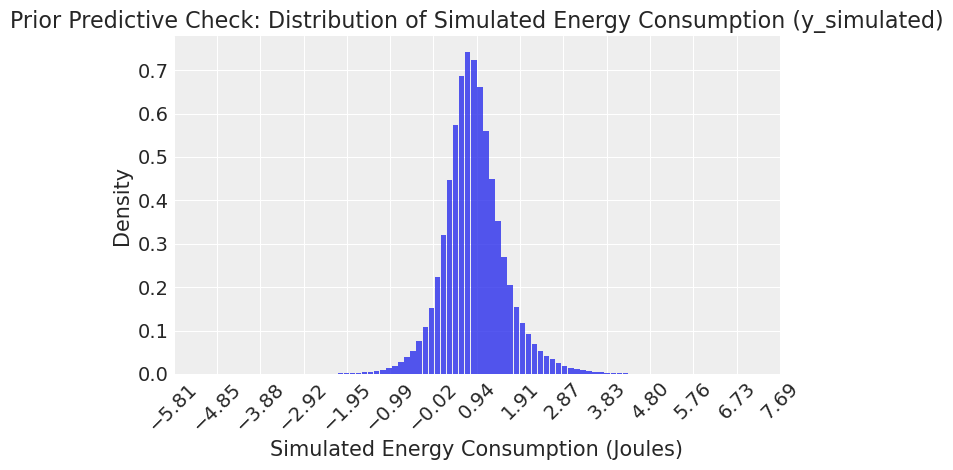

/var/folders/yw/s572_ycn0n5d19g5p1z13l3c0000gn/T/ipykernel_93437/2312465178.py:61: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


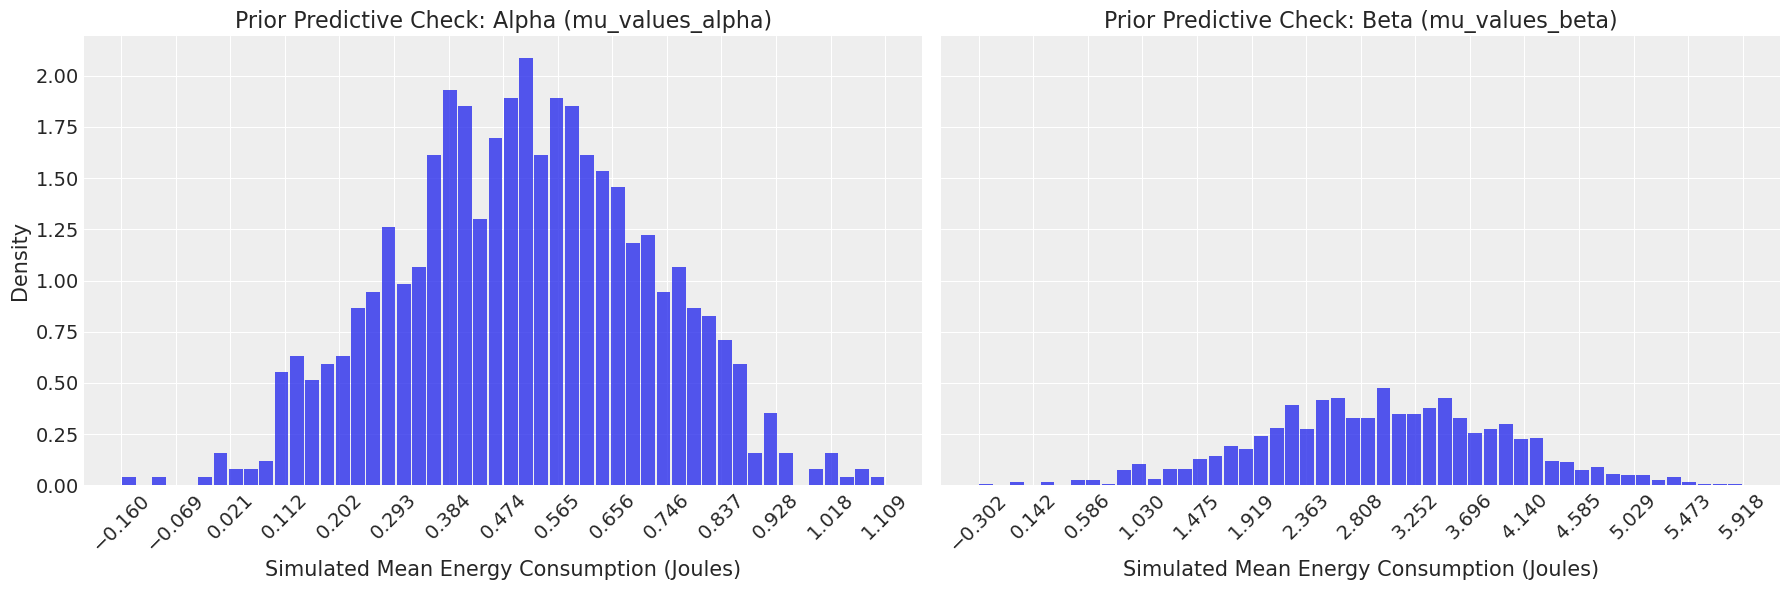


Plotting Prior Distributions for Parameters:


/var/folders/yw/s572_ycn0n5d19g5p1z13l3c0000gn/T/ipykernel_93437/2312465178.py:97: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


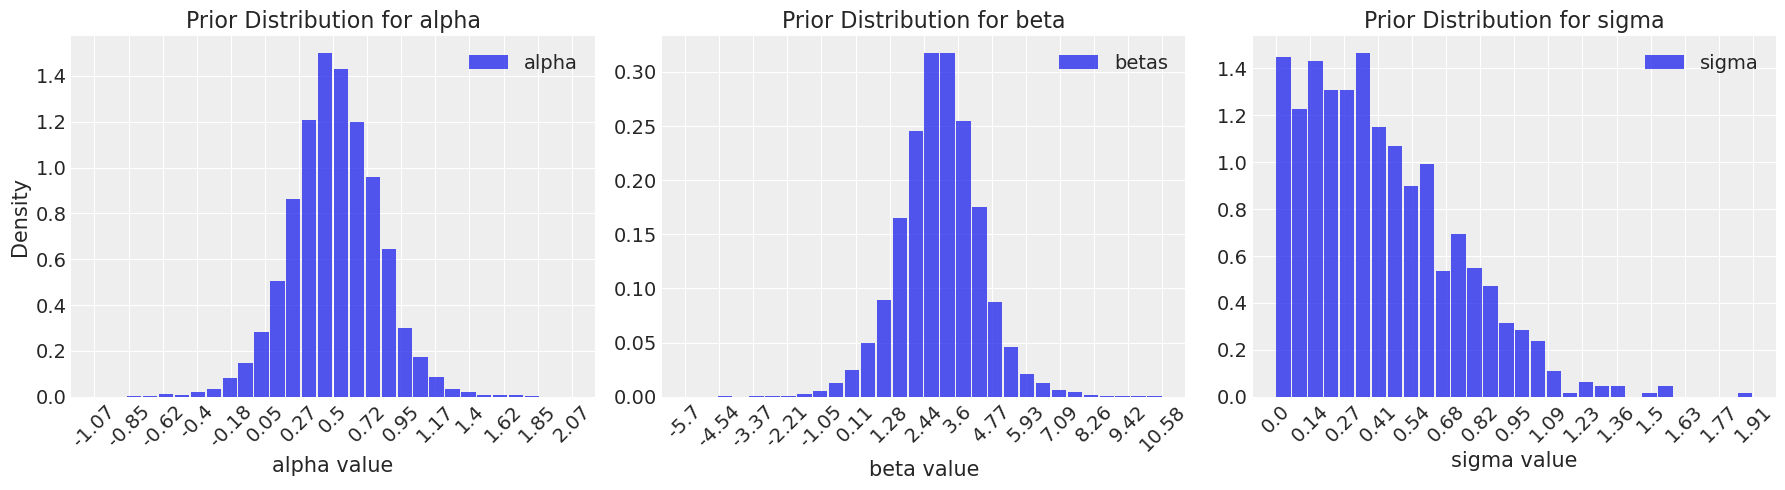


Percentage of simulated energy consumption values (energy_obs) < 0: 7.19%
Percentage of simulated mean energy values (alpha_pop) < 0: 0.30%
Percentage of simulated mean energy values (beta_pop) < 0: 0.20%


In [238]:
# Define the model for prior predictive checks
with pm.Model() as model_h3_prior_pred:
    # Hyperpriors for the population-level intercept and slope
    alpha_pop = pm.Normal("alpha_pop", mu=0.5, sigma=.2)  # Population-level intercept
    beta_pop = pm.Normal("beta_pop", mu=3, sigma=1)  # Population-level slope

    # Hyperpriors for the variability in intercepts and slopes
    sigma_alpha = pm.HalfNormal("sigma_alpha", sigma=.2)   # Variability in intercepts
    sigma_beta = pm.HalfNormal("sigma_beta", sigma=1)     # Variability in slopes

    # Group-level intercepts and slopes for each endpoint
    alpha = pm.Normal("alpha", mu=alpha_pop, sigma=sigma_alpha, shape=n_endpoints)
    beta = pm.Normal("beta", mu=beta_pop, sigma=sigma_beta, shape=n_endpoints)

    # Model for energy consumption
    mu = alpha[endpoint_idx] + beta[endpoint_idx] * runtime
    sigma = pm.HalfNormal("sigma", sigma=.5)  # Residual standard deviation

    # Likelihood
    energy_obs = pm.Normal("energy_obs", mu=mu, sigma=sigma, shape = y.shape[0])

    # Sample from the prior predictive distribution
    prior_pred_samples_h3 = pm.sample_prior_predictive(samples=1000, random_seed=42)

# Plot the prior predictive distribution for simulated energy consumption (y_simulated)
print("Plotting Prior Predictive Distribution for y_simulated (Energy Consumption):")
simulated_y = prior_pred_samples_h3.prior["energy_obs"].stack(samples = ("chain", "draw")).values  # Stack simulated values
az.plot_dist(simulated_y, kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 100})  # Plot using ArviZ
plt.xlabel("Simulated Energy Consumption (Joules)")
plt.ylabel("Density")
plt.title("Prior Predictive Check: Distribution of Simulated Energy Consumption (y_simulated)")
x_llimit, x_ulimit = np.min(simulated_y), np.max(simulated_y)
plt.xlim(x_llimit, x_ulimit)  # Set x-axis limits
plt.xticks(np.linspace(x_llimit, x_ulimit, num = 15), rotation = 45)
plt.tight_layout()
plt.show()

# Plotting the prior predictive distributions for mu_values_alpha and mu_values_beta side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Plot for mu_values_alpha
mu_values_alpha = prior_pred_samples_h3.prior["alpha_pop"].stack(samples=("chain", "draw"))
az.plot_dist(mu_values_alpha, kind="hist", hist_kwargs={'alpha': 0.8, 'bins': 50}, ax=axes[0])
axes[0].set_xlabel("Simulated Mean Energy Consumption (Joules)")
axes[0].set_ylabel("Density")
axes[0].set_title("Prior Predictive Check: Alpha (mu_values_alpha)")
x_min_alpha, x_max_alpha = np.min(mu_values_alpha), np.max(mu_values_alpha)
axes[0].set_xticks(np.linspace(x_min_alpha, x_max_alpha, num=15))
axes[0].tick_params(axis='x', rotation=45)

# Plot for mu_values_beta
mu_values_beta = prior_pred_samples_h3.prior["beta_pop"].stack(samples=("chain", "draw"))
az.plot_dist(mu_values_beta, kind="hist", hist_kwargs={'alpha': 0.8, 'bins': 50}, ax=axes[1])
axes[1].set_xlabel("Simulated Mean Energy Consumption (Joules)")
axes[1].set_title("Prior Predictive Check: Beta (mu_values_beta)")
x_min_beta, x_max_beta = np.min(mu_values_beta), np.max(mu_values_beta)
axes[1].set_xticks(np.linspace(x_min_beta, x_max_beta, num=15))
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


# Plotting the distributions of the priors themselves for alpha, betas, and sigma
print("\nPlotting Prior Distributions for Parameters:")
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Alphas
alpha_values = prior_pred_samples_h3.prior["alpha"].stack(samples = ("chain", "draw"))
az.plot_dist(alpha_values, ax = axes[0], label = "alpha", kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 30})
x_ticks = np.linspace(np.min(alpha_values), np.max(alpha_values), num = 15)
axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels(np.round(x_ticks, 2), rotation = 45)
axes[0].set_title("Prior Distribution for alpha")
axes[0].set_xlabel("alpha value")
axes[0].set_ylabel("Density")

# Betas
beta_values = prior_pred_samples_h3.prior["beta"].stack(samples = ("chain", "draw"))
az.plot_dist(beta_values, ax = axes[1], label = "betas", kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 30})
x_ticks = np.linspace(np.min(beta_values), np.max(beta_values), num = 15)
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels(np.round(x_ticks, 2), rotation = 45)
axes[1].set_title("Prior Distribution for beta")
axes[1].set_xlabel("beta value")

# Sigmas
sigma_values = prior_pred_samples_h3.prior["sigma"].stack(samples = ("chain", "draw"))
az.plot_dist(sigma_values, ax = axes[2], label = "sigma", kind = "hist", hist_kwargs = {'alpha': .8, 'bins': 30})
x_ticks = np.linspace(np.min(sigma_values), np.max(sigma_values), num = 15)
axes[2].set_xticks(x_ticks)
axes[2].set_xticklabels(np.round(x_ticks, 2), rotation = 45)
axes[2].set_title("Prior Distribution for sigma")
axes[2].set_xlabel("sigma value")

plt.tight_layout()
plt.show()

# Check for negative energy values for h3
simulated_y_flat = prior_pred_samples_h3.prior["energy_obs"].stack(samples=("chain", "draw")).values
negative_y_percentage = np.mean(simulated_y_flat < 0) * 100
print(f"\nPercentage of simulated energy consumption values (energy_obs) < 0: {negative_y_percentage:.2f}%")

simulated_mu_flat = prior_pred_samples_h3.prior["alpha_pop"].stack(samples=("chain", "draw")).values
negative_mu_alpha_percentage = np.mean(simulated_mu_flat < 0) * 100
print(f"Percentage of simulated mean energy values (alpha_pop) < 0: {negative_mu_alpha_percentage:.2f}%")

simulated_mu_flat = prior_pred_samples_h3.prior["beta_pop"].stack(samples=("chain", "draw")).values
negative_mu_beta_percentage = np.mean(simulated_mu_flat < 0) * 100
print(f"Percentage of simulated mean energy values (beta_pop) < 0: {negative_mu_beta_percentage:.2f}%")

<br>

### 5. Model Fitting and Sampling

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_pop, beta_pop, sigma_alpha, sigma_beta, alpha, beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 43 seconds.


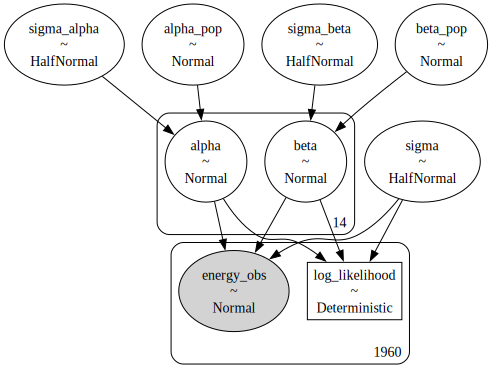

In [239]:
# Define the multilevel model
with pm.Model() as model_h3:
    # Hyperpriors for the population-level intercept and slope
    alpha_pop = pm.Normal("alpha_pop", mu=0.5, sigma=.2)  # Population-level intercept
    beta_pop = pm.Normal("beta_pop", mu=3, sigma=0.5)  # Population-level slope

    # Hyperpriors for the variability in intercepts and slopes
    sigma_alpha = pm.HalfNormal("sigma_alpha", sigma=.2)   # Variability in intercepts
    sigma_beta = pm.HalfNormal("sigma_beta", sigma=0.5)     # Variability in slopes

    # Group-level intercepts and slopes for each endpoint
    alpha = pm.Normal("alpha", mu=alpha_pop, sigma=sigma_alpha, shape=n_endpoints)
    beta = pm.Normal("beta", mu=beta_pop, sigma=sigma_beta, shape=n_endpoints)

    # Model for energy consumption
    mu = alpha[endpoint_idx] + beta[endpoint_idx] * runtime
    sigma = pm.HalfNormal("sigma", sigma=.3)  # Residual standard deviation

    # Likelihood
    energy_obs = pm.Normal("energy_obs", mu=mu, sigma=sigma, observed=y)

    # Add log likelihood
    log_likelihood = pm.logp(energy_obs, y)  # Pass the observed data explicitly
    pm.Deterministic("log_likelihood", log_likelihood)

    # Sampling
    trace_h3 = pm.sample(2000, tune=1000, target_accept=0.95, return_inferencedata=True, random_seed=42, idata_kwargs={"log_likelihood": True})

pm.model_to_graphviz(model_h3)

In [240]:
# import matplotlib.pyplot as plt
# import arviz as az

# # Extract posterior means
# alpha_pop_mean = trace_h3.posterior["alpha_pop"].mean().item()
# beta_pop_mean = trace_h3.posterior["beta_pop"].mean().item()
# alpha_means = trace_h3.posterior["alpha"].mean(dim=["chain", "draw"]).values
# beta_means = trace_h3.posterior["beta"].mean(dim=["chain", "draw"]).values

# # Shrinkage plot for alpha
# plt.figure(figsize=(12, 6))
# plt.scatter(range(len(alpha_means)), alpha_means, color="blue", label="Group-level alpha")
# plt.axhline(alpha_pop_mean, color="red", linestyle="--", label="Population-level alpha_pop")
# plt.xlabel("Endpoints")
# plt.ylabel("Alpha")
# plt.title("Shrinkage Plot for Alpha")
# plt.legend()
# plt.show()

# # Shrinkage plot for beta
# plt.figure(figsize=(12, 6))
# plt.scatter(range(len(beta_means)), beta_means, color="green", label="Group-level beta")
# plt.axhline(beta_pop_mean, color="red", linestyle="--", label="Population-level beta_pop")
# plt.xlabel("Endpoints")
# plt.ylabel("Beta")
# plt.title("Shrinkage Plot for Beta")
# plt.legend()
# plt.show()

<br>

### 6. Trace Plot and Summary Analysis

We use **trace plots** to visualize the posterior distributions generated by the four chains in the sampling process. We use **summary statistics** to assess the convergence, quality of estimates, and statistical significance. 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_pop,-0.0060,0.0054,-0.0160,0.0045,0.0001,0.0000,7708.9711,5497.0569,1.0004
beta_pop,3.0945,0.0476,3.0028,3.1840,0.0006,0.0004,6848.5426,5535.8952,1.0007
sigma_alpha,0.0180,0.0048,0.0108,0.0275,0.0001,0.0000,5323.9352,5321.4790,1.0002
sigma_beta,0.1529,0.0394,0.0894,0.2250,0.0006,0.0004,5359.2210,5713.2439,1.0009
sigma,0.0327,0.0005,0.0317,0.0337,0.0000,0.0000,12758.1595,5874.1785,1.0006


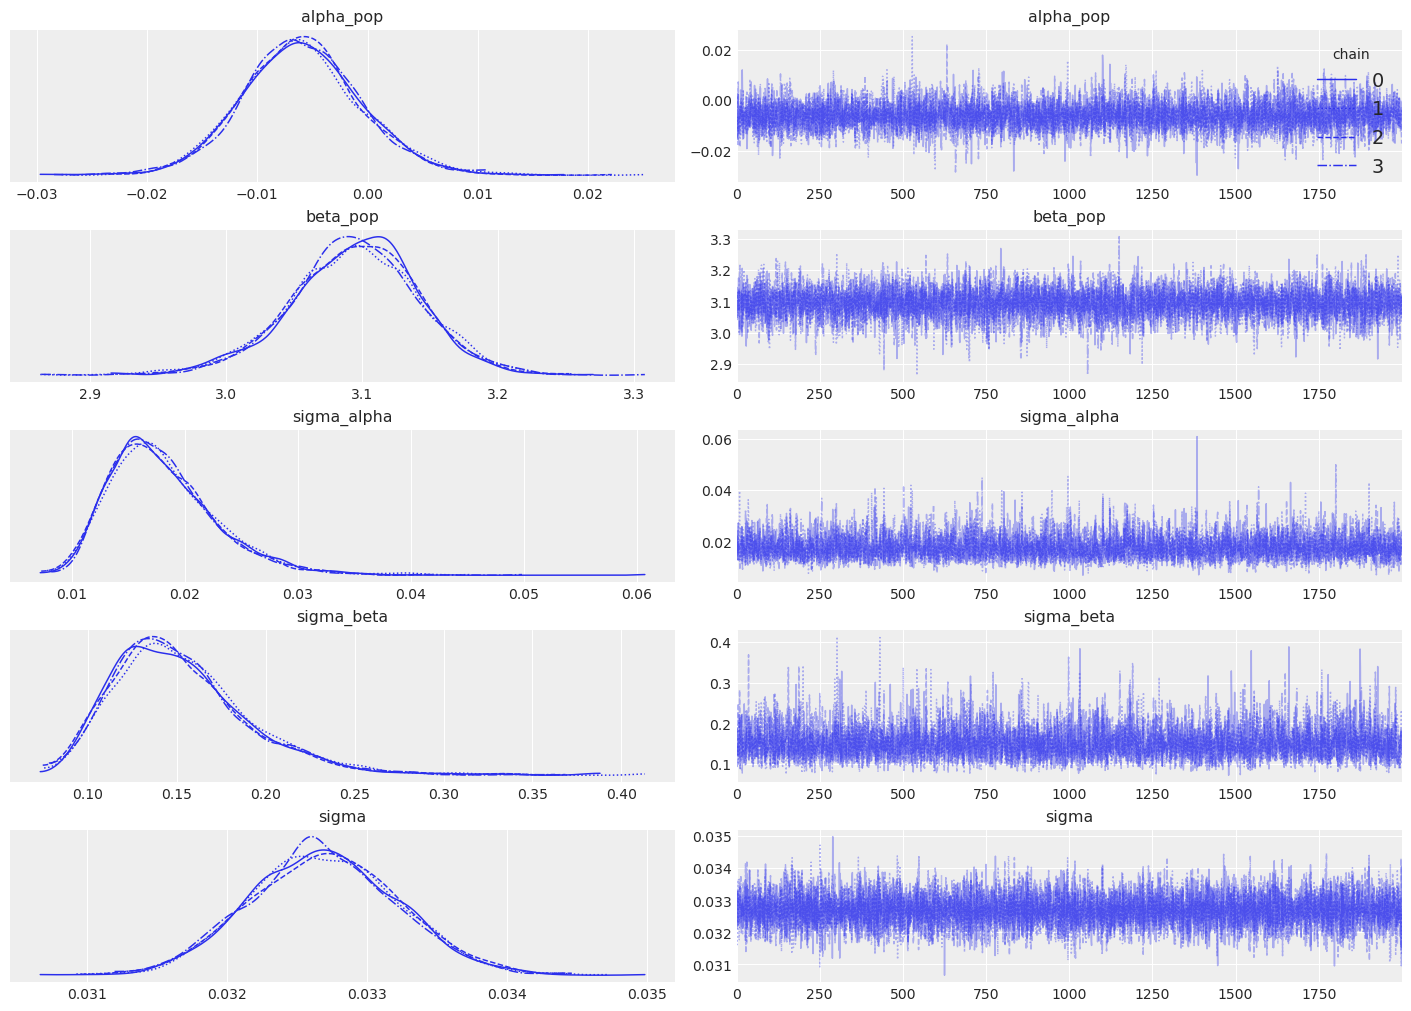

In [241]:
### Posterior analysis
# Summarize the results
az.plot_trace(trace_h3, var_names = ["alpha_pop", "beta_pop", "sigma_alpha", "sigma_beta", "sigma"], figsize = (14, 10), legend = True)
az.summary(trace_h3, var_names=["alpha_pop", "beta_pop", "sigma_alpha", "sigma_beta", "sigma"], round_to=4)


Text(0.5, 1.0, 'Posterior Distributions of Endpoint-Specific Intercepts and Slopes')

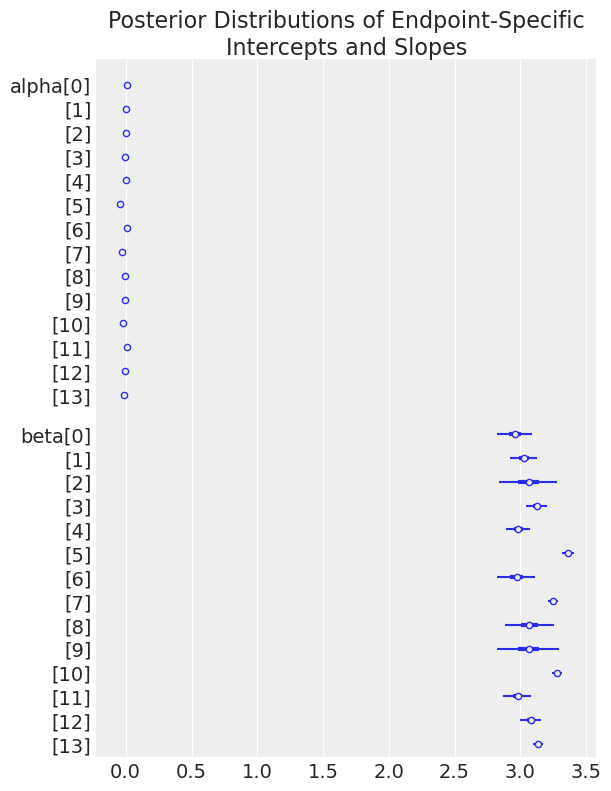

In [242]:
# Plot the posterior distributions
az.plot_forest(trace_h3, var_names=["alpha", "beta"], combined=True, hdi_prob=0.95)
plt.title("Posterior Distributions of Endpoint-Specific Intercepts and Slopes")

<br>

### 7. Posterior Predictive Checks

We perform posterior predictive checks to assess the model's fit to the data. By sampling from the posterior distribution, we can compare the observed data to the predicted responses. We plot the observed energy consumption values against the predicted values.

Sampling: [energy_obs]


Output()

Text(0.5, 1.0, 'Posterior predictive check (distribution of predicted variable)')

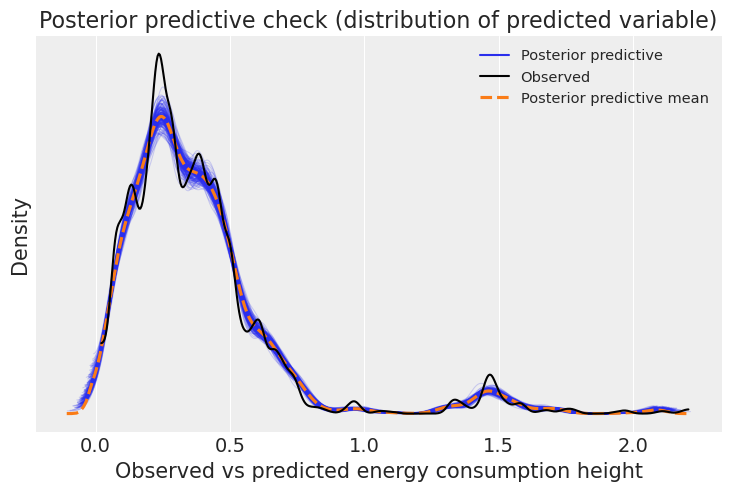

In [243]:
#Generate posterior predictive samples
with model_h3:
    ppc_h3 = pm.sample_posterior_predictive(trace_h3, var_names = ["energy_obs"], random_seed = 42)

_, ax = plt.subplots()
az.plot_ppc(ppc_h3, num_pp_samples = 200, ax = ax)
ax.set_xlabel("Observed vs predicted energy consumption height")
ax.set_ylabel("Density")
ax.set_title("Posterior predictive check (distribution of predicted variable)")

<br>

### 8. Hypothesis Conclusion

P(beta_/add_message > beta_/api/fllws/user) = 0.200
P(beta_/add_message > beta_/api/latest) = 0.206
P(beta_/add_message > beta_/api/msgs) = 0.018
P(beta_/add_message > beta_/api/msgs/user0) = 0.371
P(beta_/add_message > beta_/api/register) = 0.000
P(beta_/add_message > beta_/api/unfllws/user) = 0.456
P(beta_/add_message > beta_/login) = 0.000
P(beta_/add_message > beta_/logout) = 0.163
P(beta_/add_message > beta_/public) = 0.210
P(beta_/add_message > beta_/register) = 0.000
P(beta_/add_message > beta_/user/follow) = 0.400
P(beta_/add_message > beta_/user/unfollow) = 0.056
P(beta_/add_message > beta_/user/user0) = 0.005
P(beta_/api/fllws/user > beta_/add_message) = 0.800
P(beta_/api/fllws/user > beta_/api/latest) = 0.394
P(beta_/api/fllws/user > beta_/api/msgs) = 0.079
P(beta_/api/fllws/user > beta_/api/msgs/user0) = 0.731
P(beta_/api/fllws/user > beta_/api/register) = 0.000
P(beta_/api/fllws/user > beta_/api/unfllws/user) = 0.757
P(beta_/api/fllws/user > beta_/login) = 0.000
P(beta_/ap

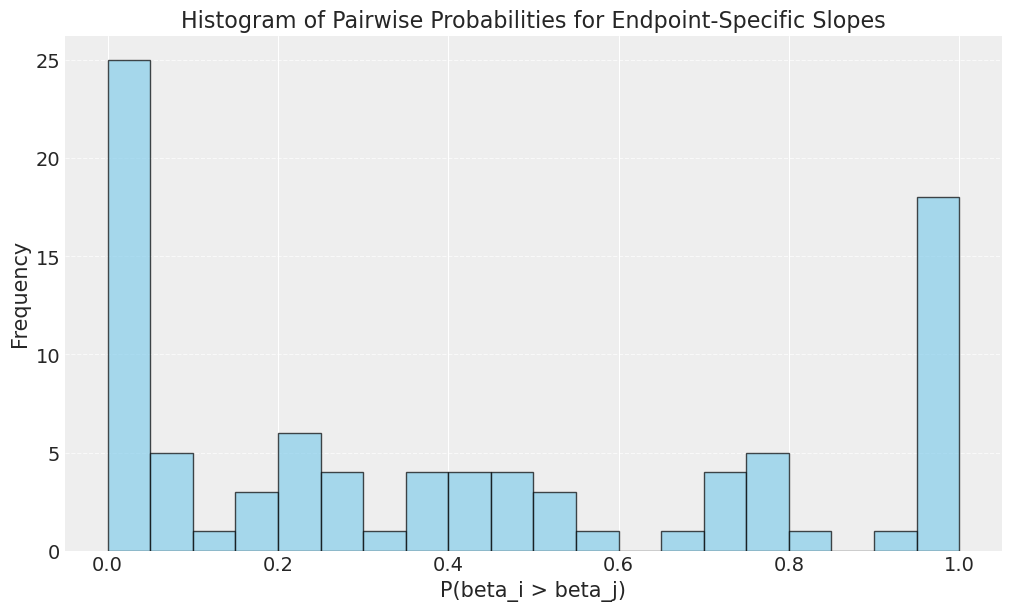

In [249]:
# Extract posterior samples for betas (endpoint-specific slopes)
posterior_betas = trace_h3.posterior['beta']  # Shape: (chains, draws, num_endpoints)

# Calculate pairwise probabilities for each endpoint
num_endpoints = posterior_betas.shape[-1]
prob_beta_greater = np.zeros((num_endpoints, num_endpoints))

for i in range(num_endpoints):
    for j in range(num_endpoints):
        if i != j:
            # Probability that beta for endpoint i is greater than beta for endpoint j
            prob_beta_greater[i, j] = (posterior_betas[..., i] > posterior_betas[..., j]).mean()

# Display the probabilities in a readable format
endpoint_names = endpoint_categories  # Assuming this contains the names of the endpoints
for i, name_i in enumerate(endpoint_names):
    for j, name_j in enumerate(endpoint_names):
        if i != j:
            print(f"P(beta_{name_i} > beta_{name_j}) = {prob_beta_greater[i, j]:.3f}")


# Flatten the pairwise probabilities into a 1D array
prob_beta_greater_flat = prob_beta_greater[np.triu_indices(num_endpoints, k=1)]  # Use only upper triangle to avoid duplicates

# Plot a histogram of the pairwise probabilities
plt.figure(figsize=(10, 6))
plt.hist(prob_beta_greater_flat, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("P(beta_i > beta_j)")
plt.ylabel("Frequency")
plt.title("Histogram of Pairwise Probabilities for Endpoint-Specific Slopes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

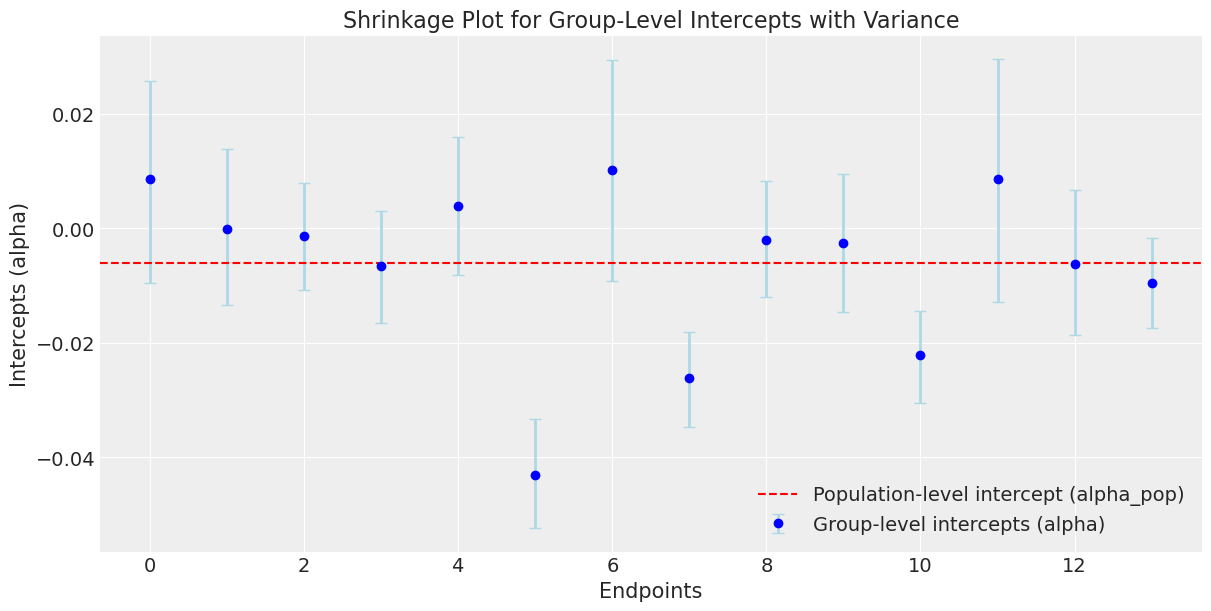

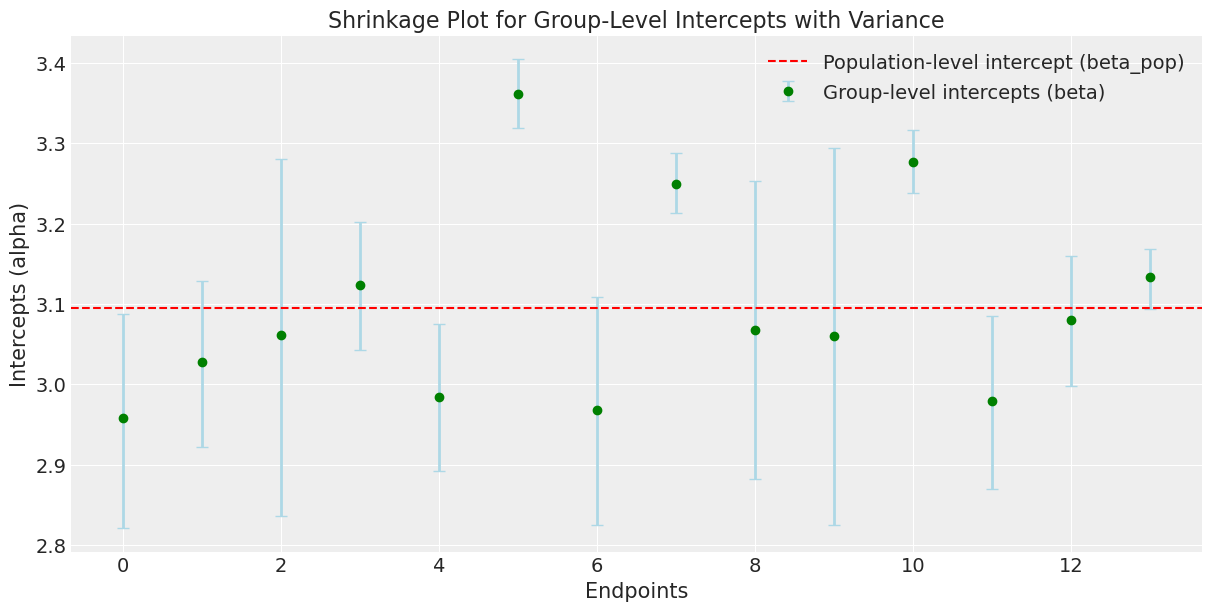

In [245]:
import matplotlib.pyplot as plt
import arviz as az
import numpy as np

# Extract posterior means and credible intervals for population-level and group-level parameters
alpha_pop_mean = trace_h3.posterior["alpha_pop"].mean().item()
alpha_means = trace_h3.posterior["alpha"].mean(dim=["chain", "draw"]).values
alpha_hdi = az.hdi(trace_h3.posterior["alpha"], hdi_prob=0.95) # 95% credible intervals

lower = alpha_hdi["alpha"].sel(hdi="lower").values
upper = alpha_hdi["alpha"].sel(hdi="higher").values

endpoints = np.arange(len(alpha_means))  # x-axis: endpoint indices

# Create the shrinkage plot
plt.figure(figsize=(12, 6))
# Plot group-level intercepts with error bars (credible intervals)
plt.errorbar(
    endpoints,
    alpha_means,
    yerr=[alpha_means - lower, upper - alpha_means],
    fmt="o",
    color="blue",
    ecolor="lightblue",
    elinewidth=2,
    capsize=4,
    label="Group-level intercepts (alpha)",
)
# Add a horizontal line for the population-level intercept
plt.axhline(alpha_pop_mean, color="red", linestyle="--", label="Population-level intercept (alpha_pop)")

# Add labels, title, and legend
plt.xlabel("Endpoints")
plt.ylabel("Intercepts (alpha)")
plt.title("Shrinkage Plot for Group-Level Intercepts with Variance")
plt.legend()
plt.grid(True)
plt.show()

####################################################

# Extract posterior means and credible intervals for population-level and group-level parameters
beta_pop_mean = trace_h3.posterior["beta_pop"].mean().item()
beta_means = trace_h3.posterior["beta"].mean(dim=["chain", "draw"]).values
beta_hdi = az.hdi(trace_h3.posterior["beta"], hdi_prob=0.95) # 95% credible intervals

lower = beta_hdi["beta"].sel(hdi="lower").values
upper = beta_hdi["beta"].sel(hdi="higher").values

endpoints = np.arange(len(beta_means))  # x-axis: endpoint indices

# Create the shrinkage plot
plt.figure(figsize=(12, 6))
# Plot group-level intercepts with error bars (credible intervals)
plt.errorbar(
    endpoints,
    beta_means,
    yerr=[beta_means - lower, upper - beta_means],
    fmt="o",
    color="green",
    ecolor="lightblue",
    elinewidth=2,
    capsize=4,
    label="Group-level intercepts (beta)",
)
# Add a horizontal line for the population-level intercept
plt.axhline(beta_pop_mean, color="red", linestyle="--", label="Population-level intercept (beta_pop)")

# Add labels, title, and legend
plt.xlabel("Endpoints")
plt.ylabel("Intercepts (alpha)")
plt.title("Shrinkage Plot for Group-Level Intercepts with Variance")
plt.legend()
plt.grid(True)
plt.show()

<br><br><br><br><br>

# **Information Criteria Analysis**

We want to analyze and compare the models used to evaluate H1, H2, and H3. We do this using **information criteria** based on the **Widely Applicable Information Criterion** (WAIC) and the **Leave-One-Out Information Criterion** (LOOIC). These criteria help us assess the goodness of fit of our models while penalizing for complexity.

We also intent to compare the three models, using the `az.compare` function, again measuring on both WAIC and LOOIC.

<br>

### Individual Model Analysis

In [246]:
# For H1 model
waic_h1 = az.waic(trace_h1)
loo_h1 = az.loo(trace_h1)
print("H1 Model WAIC:\n", waic_h1)
print("\nH1 Model LOO:\n", loo_h1)

# For H2 model
waic_h2 = az.waic(trace_h2)
loo_h2 = az.loo(trace_h2)
print("\nH2 Model WAIC:\n", waic_h2)
print("\nH2 Model LOO:\n", loo_h2)

# For H3 model
waic_h3 = az.waic(trace_h3)
loo_h3 = az.loo(trace_h3)
print("\nH3 Model WAIC:\n", waic_h3)
print("\nH3 Model LOO:\n", loo_h3)

/Users/chris/opt/anaconda3/envs/prpro-2025/lib/python3.12/site-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


H1 Model WAIC:
 Computed from 8000 posterior samples and 1960 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -189.47    61.17
p_waic       10.59        -

There has been a warning during the calculation. Please check the results.

H1 Model LOO:
 Computed from 8000 posterior samples and 1960 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -189.48    61.17
p_loo       10.60        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)     1960  100.0%
   (0.70, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%



/Users/chris/opt/anaconda3/envs/prpro-2025/lib/python3.12/site-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(



H2 Model WAIC:
 Computed from 8000 posterior samples and 1960 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -188.80    60.49
p_waic       10.49        -

There has been a warning during the calculation. Please check the results.

H2 Model LOO:
 Computed from 8000 posterior samples and 1960 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -188.81    60.49
p_loo       10.50        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)     1960  100.0%
   (0.70, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%



/Users/chris/opt/anaconda3/envs/prpro-2025/lib/python3.12/site-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/chris/opt/anaconda3/envs/prpro-2025/lib/python3.12/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(



H3 Model WAIC:
 Computed from 8000 posterior samples and 1960 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  3866.85   220.65
p_waic       96.56        -

There has been a warning during the calculation. Please check the results.

H3 Model LOO:
 Computed from 8000 posterior samples and 1960 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  3878.72   210.80
p_loo       84.69        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)     1958   99.9%
   (0.70, 1]   (bad)         1    0.1%
   (1, Inf)   (very bad)    1    0.1%



**Interpretation of Information Criteria**

* **H1:**

* **H2:**

* **H3:**

<br>

### Model Comparison

In [247]:
# Dict of models
models_dict = {
    'H1': trace_h1,
    'H2': trace_h2,
    'H3': trace_h3
}

# Comparison using LOO
comparison_loo = az.compare(models_dict)
print('\nModel Comparison (LOO):\n', comparison_loo)

# Comparison using WAIC
comparison_waic = az.compare(models_dict, ic = 'waic')
print('\nModel Comparison (WAIC):\n', comparison_waic)

/Users/chris/opt/anaconda3/envs/prpro-2025/lib/python3.12/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(



Model Comparison (LOO):
     rank     elpd_loo      p_loo    elpd_diff    weight          se  \
H3     0  3878.724234  84.689572     0.000000  0.987242  210.797385   
H2     1  -188.808496  10.502003  4067.532730  0.012758   60.493488   
H1     2  -189.476705  10.604369  4068.200939  0.000000   61.171878   

           dse  warning scale  
H3    0.000000     True   log  
H2  196.504631    False   log  
H1  196.337866    False   log  


/Users/chris/opt/anaconda3/envs/prpro-2025/lib/python3.12/site-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/chris/opt/anaconda3/envs/prpro-2025/lib/python3.12/site-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/chris/opt/anaconda3/envs/prpro-2025/lib/python3.12/site-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(



Model Comparison (WAIC):
     rank    elpd_waic     p_waic    elpd_diff    weight          se  \
H3     0  3866.849864  96.563942     0.000000  0.987242  220.646704   
H2     1  -188.799157  10.492664  4055.649021  0.012758   60.492597   
H1     2  -189.466634  10.594298  4056.316498  0.000000   61.169716   

           dse  warning scale  
H3    0.000000     True   log  
H2  206.253311     True   log  
H1  206.083235     True   log  
